## Setup

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [259]:
df = pd.read_csv("remote_work_employee_productivity.csv")

fixed_column_names = []
for column in df.columns:
    fixed_column_name = column.replace("\n", "")
    fixed_column_names.append(fixed_column_name)
df.columns = fixed_column_names

In [260]:
demographics_columns = [*range(53, 60, 1)]
demographics_column_names = [ df.columns[i] for i in demographics_columns ]

positive_dict = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly Agree": 5
}

negative_dict = {
    "Strongly disagree": 5,
    "Disagree": 4,
    "Neutral": 3,
    "Agree": 2,
    "Strongly Agree": 1
}
sentiment_dict = [positive_dict, negative_dict]

In [261]:
def replace_sentiment_with_numerics(dictionary, df):
    replacement_dict = { df.columns[i]: sentiment_dict[dictionary[i]] for i in range(len(dictionary)) }
    return df.replace(replacement_dict)

In [262]:
def add_total_and_mean_columns(df, size):
    df["total"] = df.iloc[:, 0:size].sum(axis=1)
    df["mean"] = df["total"] / size

In [263]:
def generate_group_dfs(df):
    return [df[[demographics_column_names[i], "mean"]].groupby(demographics_column_names[i]).mean() for i in range(len(demographics_column_names))]

In [264]:
def plot_bar_graph(df, title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = df.index
    y = df["mean"]
    ax.bar(x, y)
    ax.set_title(title)
    ax.set_ylabel("Mean score")
    ax.set_xlabel(df.index.name)
    ax.set_yticks(np.arange(0, 5.5, 0.5))
    plt.show()

## Setup for aggregated mean data

In [265]:
aggregated_df = df.iloc[:, demographics_columns]

## Self leadership

In [266]:
section_dict = [1, 1, 1, 0, 0, 0, 0, 0]
section_columns = [*range(1, 9, 1)]
section_df = df.iloc[:, section_columns + demographics_columns]
section_df.head(10)

,I have a hard time motivating myself when working remotely.,I feel that my creativity is reduced when not interacting with people.,I feel less engaged at work when working remotely.,I am my own leader when I’m working from home.,I’m in control of my schedule and pace when I'm working from home.,I’m capable of spending less hours accomplishing the same work as before.,I am more productive when I’m working from home.,My job allows me to make my own decisions about how to schedule my work.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,Disagree,Strongly disagree,Neutral,Agree,Strongly Agree,Agree,Agree,Agree,18-25,Married,No,North America,Female,Caucasian,IT
1,Disagree,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree,18-25,Single,No,North America,Male,others,IT
2,Strongly disagree,Neutral,Disagree,Agree,Strongly Agree,Agree,Strongly Agree,Agree,36-45,Married,Yes,North America,Male,Caucasian,IT
3,Disagree,Agree,Agree,Agree,Strongly Agree,Agree,Neutral,Agree,26-35,Single,No,North America,Male,Asian,IT
4,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Neutral,Disagree,Strongly Agree,18-25,Single,No,North America,Male,Caucasian,marketing
5,Strongly disagree,Strongly disagree,Strongly disagree,Neutral,Agree,Neutral,Strongly Agree,Agree,26-35,Single,No,North America,Male,Caucasian,IT
6,Agree,Neutral,Agree,Agree,Agree,Neutral,Neutral,Agree,26-35,Single,No,North America,Male,Asian,IT
7,Strongly disagree,Strongly disagree,Strongly disagree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,26-35,Single,No,North America,Male,Asian,IT
8,Disagree,Disagree,Agree,Agree,Neutral,Agree,Strongly Agree,Agree,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,Disagree,Strongly disagree,Disagree,Strongly Agree,Disagree,Agree,Neutral,Agree,36-45,Married,No,Europe,Male,Caucasian,IT


In [267]:
section_df = replace_sentiment_with_numerics(section_dict, section_df)
section_df.head(10)

,I have a hard time motivating myself when working remotely.,I feel that my creativity is reduced when not interacting with people.,I feel less engaged at work when working remotely.,I am my own leader when I’m working from home.,I’m in control of my schedule and pace when I'm working from home.,I’m capable of spending less hours accomplishing the same work as before.,I am more productive when I’m working from home.,My job allows me to make my own decisions about how to schedule my work.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,4,5,3,4,5,4,4,4,18-25,Married,No,North America,Female,Caucasian,IT
1,4,4,3,3,3,4,4,4,18-25,Single,No,North America,Male,others,IT
2,5,3,4,4,5,4,5,4,36-45,Married,Yes,North America,Male,Caucasian,IT
3,4,2,2,4,5,4,3,4,26-35,Single,No,North America,Male,Asian,IT
4,2,2,1,4,5,3,2,5,18-25,Single,No,North America,Male,Caucasian,marketing
5,5,5,5,3,4,3,5,4,26-35,Single,No,North America,Male,Caucasian,IT
6,2,3,2,4,4,3,3,4,26-35,Single,No,North America,Male,Asian,IT
7,5,5,5,5,5,5,5,5,26-35,Single,No,North America,Male,Asian,IT
8,4,4,2,4,3,4,5,4,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,4,5,4,5,2,4,3,4,36-45,Married,No,Europe,Male,Caucasian,IT


In [268]:
add_total_and_mean_columns(section_df, len(section_dict))
aggregated_df["Self \nleadership"] = section_df["mean"]
section_df.head(10)

C:\Users\Bowragon\AppData\Local\Temp\ipykernel_3140\2602384452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df["Self \nleadership"] = section_df["mean"]


,I have a hard time motivating myself when working remotely.,I feel that my creativity is reduced when not interacting with people.,I feel less engaged at work when working remotely.,I am my own leader when I’m working from home.,I’m in control of my schedule and pace when I'm working from home.,I’m capable of spending less hours accomplishing the same work as before.,I am more productive when I’m working from home.,My job allows me to make my own decisions about how to schedule my work.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?,total,mean
0,4,5,3,4,5,4,4,4,18-25,Married,No,North America,Female,Caucasian,IT,33,4.125
1,4,4,3,3,3,4,4,4,18-25,Single,No,North America,Male,others,IT,29,3.625
2,5,3,4,4,5,4,5,4,36-45,Married,Yes,North America,Male,Caucasian,IT,34,4.250
3,4,2,2,4,5,4,3,4,26-35,Single,No,North America,Male,Asian,IT,28,3.500
4,2,2,1,4,5,3,2,5,18-25,Single,No,North America,Male,Caucasian,marketing,24,3.000
5,5,5,5,3,4,3,5,4,26-35,Single,No,North America,Male,Caucasian,IT,34,4.250
6,2,3,2,4,4,3,3,4,26-35,Single,No,North America,Male,Asian,IT,25,3.125
7,5,5,5,5,5,5,5,5,26-35,Single,No,North America,Male,Asian,IT,40,5.000
8,4,4,2,4,3,4,5,4,26-35,Married,Yes,North America,Female,Caucasian,customer service,30,3.750
9,4,5,4,5,2,4,3,4,36-45,Married,No,Europe,Male,Caucasian,IT,31,3.875


In [269]:
group_dfs = generate_group_dfs(section_df)

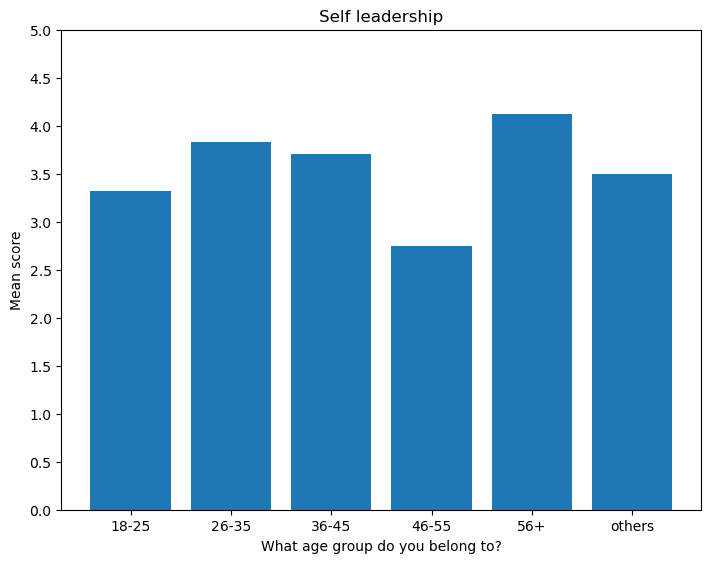

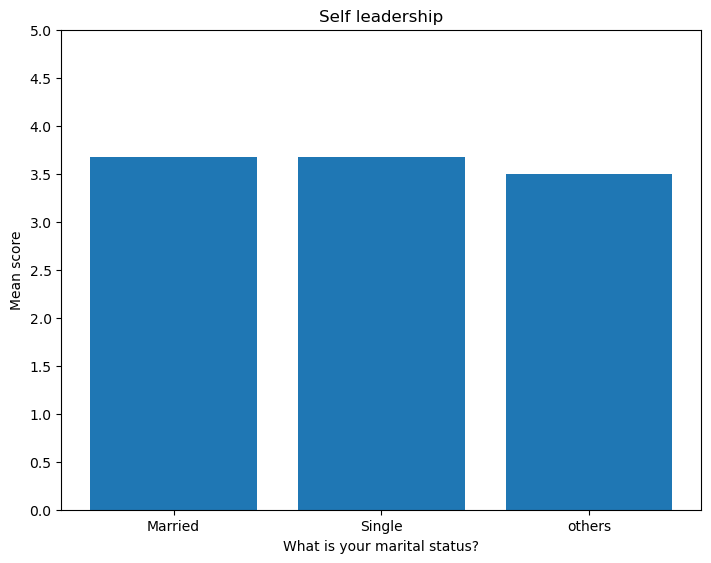

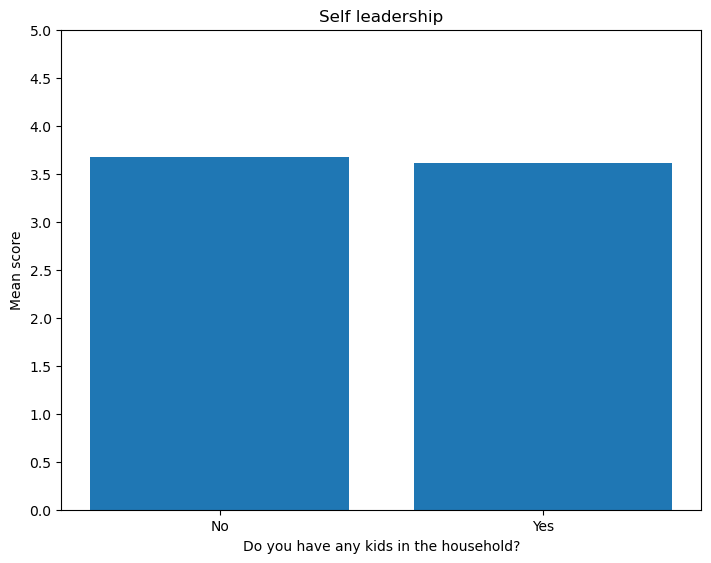

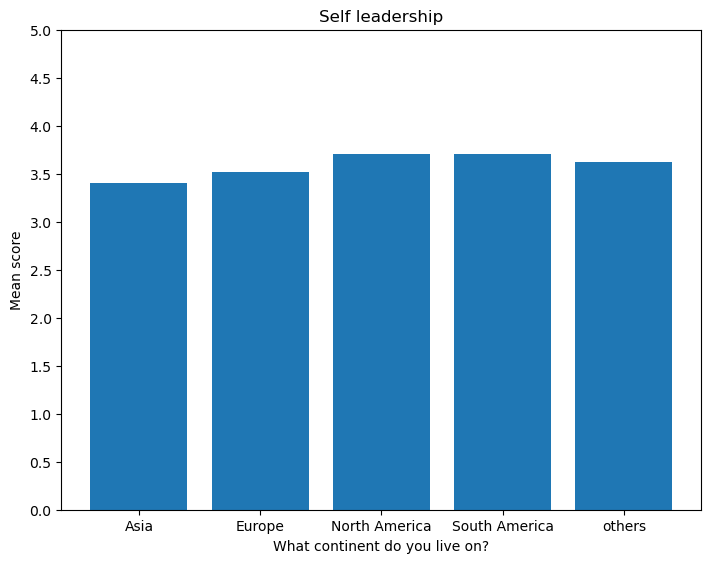

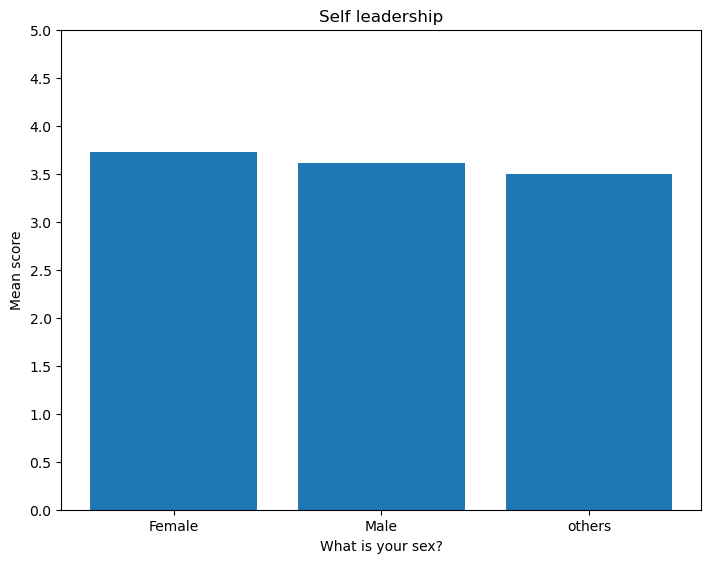

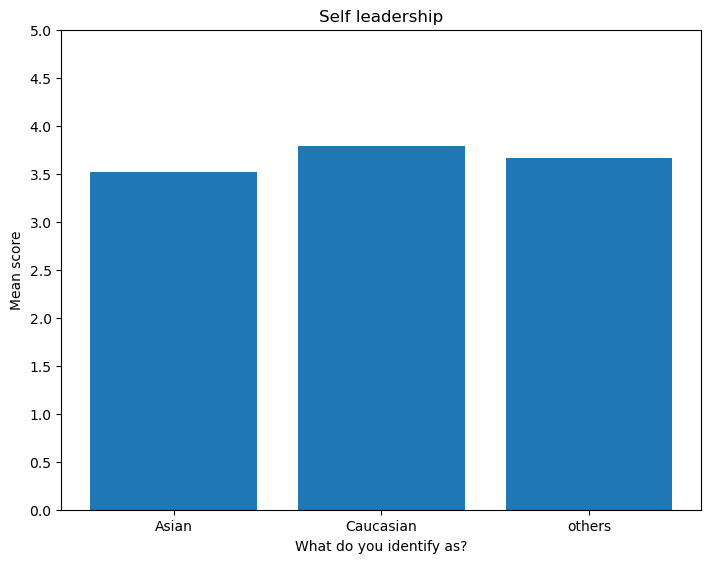

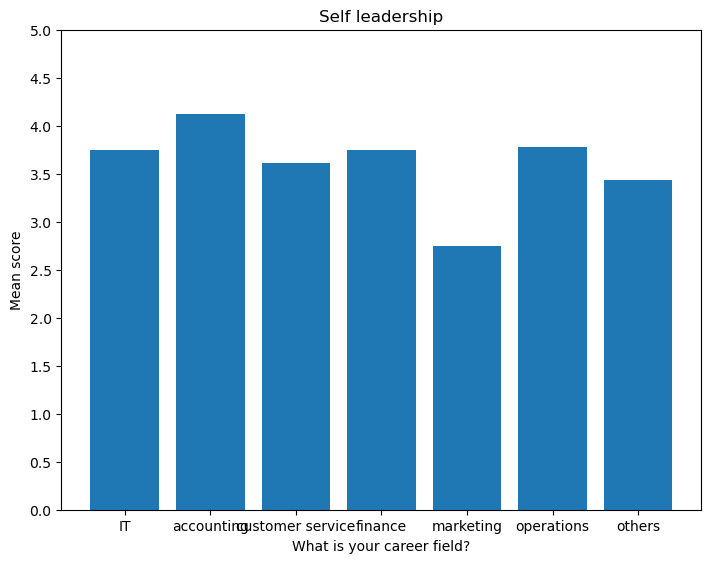

In [270]:
for group_df in group_dfs:
    plot_bar_graph(group_df, "Self leadership")

## Mental health

In [271]:
section_dict = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
section_columns = [*range(9, 21, 1)]
section_df = df.iloc[:, section_columns + demographics_columns]
section_df.head(10)

,I feel less stressed when I’m working from home.,I feel more socially isolated when I’m working from home.,I crave interactions with real people when I’m working from home.,I have a hard time separating work from personal life.,I feel like I'm at work all the time.,I tend to burn out from working remotely.,I feel isolated despite the usage of digital technologies for communication.,I miss face to face contact with colleagues.,I feel exhausted when working from home.,I suffer from anxiety or depression after spending prolonged periods at home.,I feel lonely when working from home.,I have increased conflicts with family members when working from home.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,Strongly Agree,Disagree,Strongly disagree,Disagree,Agree,Disagree,Strongly disagree,Strongly disagree,Disagree,Disagree,Disagree,Strongly disagree,18-25,Married,No,North America,Female,Caucasian,IT
1,Disagree,Agree,Disagree,Strongly disagree,Disagree,Disagree,Agree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Neutral,18-25,Single,No,North America,Male,others,IT
2,Strongly Agree,Neutral,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Neutral,Agree,Disagree,Strongly disagree,Neutral,Strongly disagree,36-45,Married,Yes,North America,Male,Caucasian,IT
3,Agree,Strongly Agree,Agree,Agree,Agree,Disagree,Agree,Agree,Neutral,Disagree,Agree,Neutral,26-35,Single,No,North America,Male,Asian,IT
4,Neutral,Strongly Agree,Agree,Disagree,Strongly disagree,Neutral,Agree,Strongly Agree,Disagree,Neutral,Neutral,Strongly disagree,18-25,Single,No,North America,Male,Caucasian,marketing
5,Strongly Agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Neutral,26-35,Single,No,North America,Male,Caucasian,IT
6,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Neutral,Agree,Agree,Neutral,Disagree,Neutral,Agree,26-35,Single,No,North America,Male,Asian,IT
7,Strongly Agree,Strongly disagree,Neutral,Strongly disagree,Strongly Agree,Neutral,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,26-35,Single,No,North America,Male,Asian,IT
8,Agree,Neutral,Neutral,Disagree,Strongly disagree,Disagree,Neutral,Disagree,Strongly disagree,Disagree,Disagree,Strongly disagree,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,Agree,Disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Disagree,Neutral,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,36-45,Married,No,Europe,Male,Caucasian,IT


In [272]:
section_df = replace_sentiment_with_numerics(section_dict, section_df)
section_df.head(10)

,I feel less stressed when I’m working from home.,I feel more socially isolated when I’m working from home.,I crave interactions with real people when I’m working from home.,I have a hard time separating work from personal life.,I feel like I'm at work all the time.,I tend to burn out from working remotely.,I feel isolated despite the usage of digital technologies for communication.,I miss face to face contact with colleagues.,I feel exhausted when working from home.,I suffer from anxiety or depression after spending prolonged periods at home.,I feel lonely when working from home.,I have increased conflicts with family members when working from home.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,5,4,5,4,2,4,5,5,4,4,4,5,18-25,Married,No,North America,Female,Caucasian,IT
1,2,2,4,5,4,4,2,4,5,5,5,3,18-25,Single,No,North America,Male,others,IT
2,5,3,4,5,5,5,3,2,4,5,3,5,36-45,Married,Yes,North America,Male,Caucasian,IT
3,4,1,2,2,2,4,2,2,3,4,2,3,26-35,Single,No,North America,Male,Asian,IT
4,3,1,2,4,5,3,2,1,4,3,3,5,18-25,Single,No,North America,Male,Caucasian,marketing
5,5,5,5,5,5,5,5,5,5,5,5,3,26-35,Single,No,North America,Male,Caucasian,IT
6,4,2,2,1,1,3,2,2,3,4,3,2,26-35,Single,No,North America,Male,Asian,IT
7,5,5,3,5,1,3,5,5,5,5,5,5,26-35,Single,No,North America,Male,Asian,IT
8,4,3,3,4,5,4,3,4,5,4,4,5,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,4,4,4,5,5,5,4,3,5,5,5,5,36-45,Married,No,Europe,Male,Caucasian,IT


In [273]:
add_total_and_mean_columns(section_df, len(section_dict))
aggregated_df["Mental \nhealth"] = section_df["mean"]
section_df.head(10)

C:\Users\Bowragon\AppData\Local\Temp\ipykernel_3140\1038342812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df["Mental \nhealth"] = section_df["mean"]


,I feel less stressed when I’m working from home.,I feel more socially isolated when I’m working from home.,I crave interactions with real people when I’m working from home.,I have a hard time separating work from personal life.,I feel like I'm at work all the time.,I tend to burn out from working remotely.,I feel isolated despite the usage of digital technologies for communication.,I miss face to face contact with colleagues.,I feel exhausted when working from home.,I suffer from anxiety or depression after spending prolonged periods at home.,...,I have increased conflicts with family members when working from home.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?,total,mean
0,5,4,5,4,2,4,5,5,4,4,...,5,18-25,Married,No,North America,Female,Caucasian,IT,51,4.250000
1,2,2,4,5,4,4,2,4,5,5,...,3,18-25,Single,No,North America,Male,others,IT,45,3.750000
2,5,3,4,5,5,5,3,2,4,5,...,5,36-45,Married,Yes,North America,Male,Caucasian,IT,49,4.083333
3,4,1,2,2,2,4,2,2,3,4,...,3,26-35,Single,No,North America,Male,Asian,IT,31,2.583333
4,3,1,2,4,5,3,2,1,4,3,...,5,18-25,Single,No,North America,Male,Caucasian,marketing,36,3.000000
5,5,5,5,5,5,5,5,5,5,5,...,3,26-35,Single,No,North America,Male,Caucasian,IT,58,4.833333
6,4,2,2,1,1,3,2,2,3,4,...,2,26-35,Single,No,North America,Male,Asian,IT,29,2.416667
7,5,5,3,5,1,3,5,5,5,5,...,5,26-35,Single,No,North America,Male,Asian,IT,52,4.333333
8,4,3,3,4,5,4,3,4,5,4,...,5,26-35,Married,Yes,North America,Female,Caucasian,customer service,48,4.000000
9,4,4,4,5,5,5,4,3,5,5,...,5,36-45,Married,No,Europe,Male,Caucasian,IT,54,4.500000


In [274]:
group_dfs = generate_group_dfs(section_df)

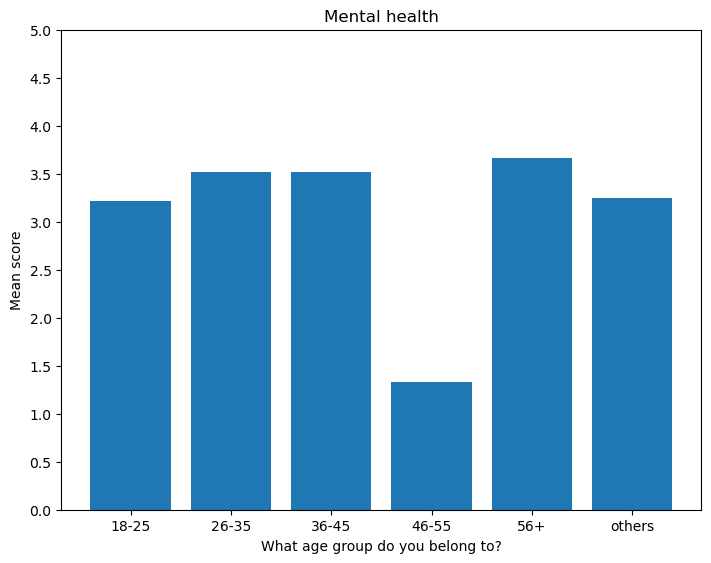

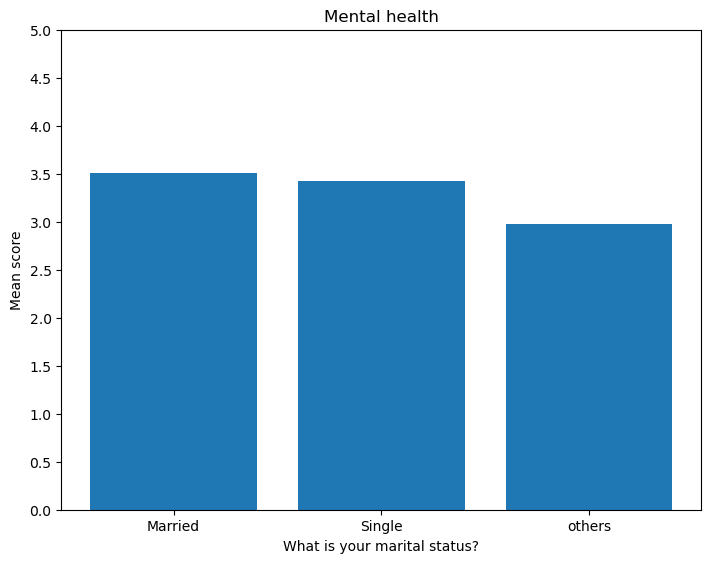

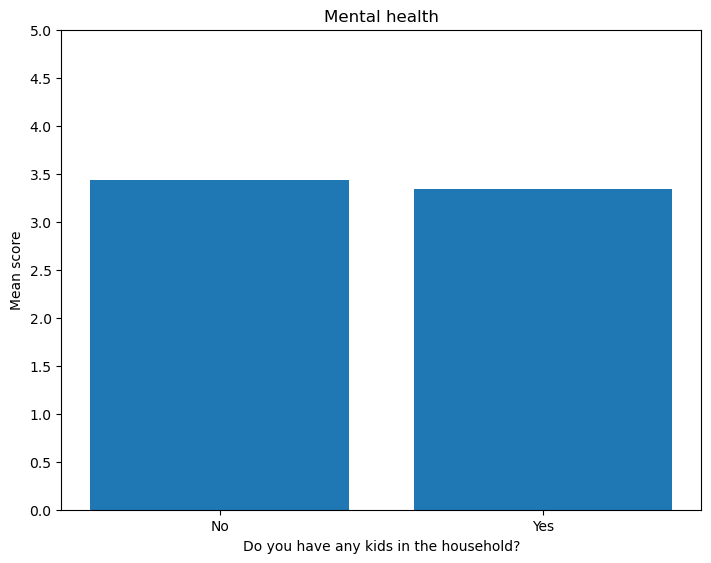

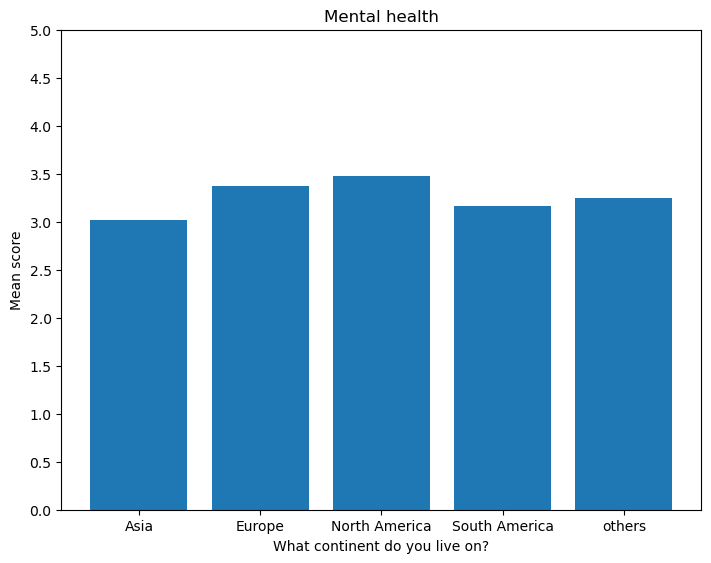

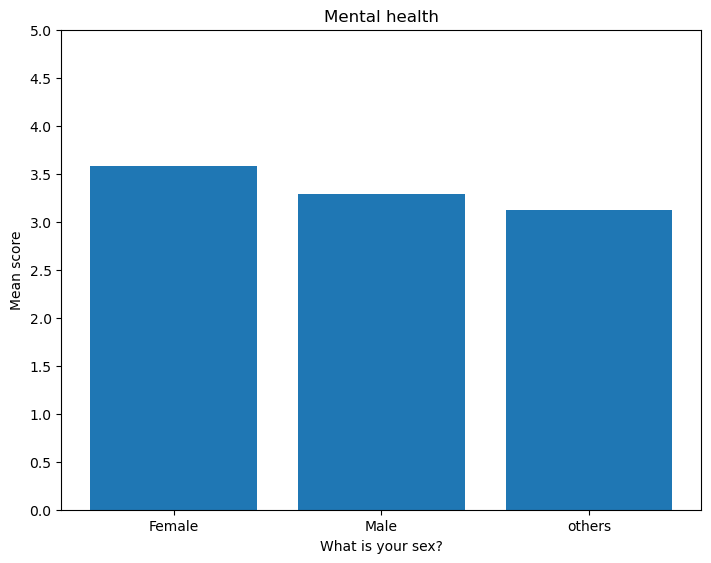

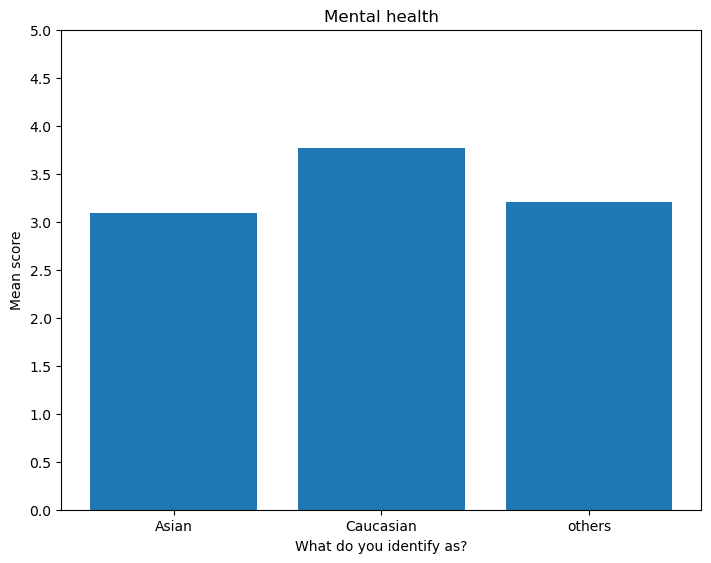

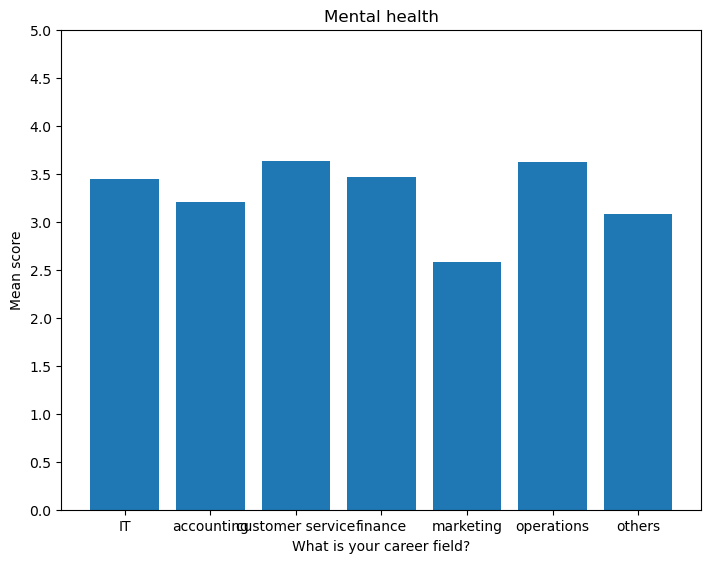

In [275]:
for group_df in group_dfs:
    plot_bar_graph(group_df, "Mental health")

## Work environment

In [276]:
section_dict = [0, 0, 1, 1, 0, 0, 1, 0]
section_columns = [*range(21, 29, 1)]
section_df = df.iloc[:, section_columns + demographics_columns]
section_df.head(10)

,I enjoy having the flexibility of working from home.,I have a better work-life balance because of working from home.,"My family (partner, kids, parents) often interfere with my work routine when I’m WFH.",I’m frequently distracted when working from home.,Having remote work has given me plenty of room to focus on deliverable items.,I am more organized when I’m working from home.,I experience family work conflict when working from home.,I am able to create an isolated space for work at home.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,Strongly Agree,Agree,Disagree,Agree,Agree,Agree,Disagree,Agree,18-25,Married,No,North America,Female,Caucasian,IT
1,Strongly Agree,Agree,Disagree,Disagree,Agree,Neutral,Neutral,Strongly Agree,18-25,Single,No,North America,Male,others,IT
2,Strongly Agree,Strongly Agree,Disagree,Disagree,Agree,Neutral,Disagree,Neutral,36-45,Married,Yes,North America,Male,Caucasian,IT
3,Agree,Agree,Disagree,Neutral,Agree,Neutral,Neutral,Disagree,26-35,Single,No,North America,Male,Asian,IT
4,Strongly Agree,Strongly Agree,Neutral,Neutral,Agree,Neutral,Strongly disagree,Disagree,18-25,Single,No,North America,Male,Caucasian,marketing
5,Strongly Agree,Strongly Agree,Strongly disagree,Disagree,Strongly Agree,Agree,Strongly disagree,Strongly Agree,26-35,Single,No,North America,Male,Caucasian,IT
6,Agree,Neutral,Strongly Agree,Neutral,Neutral,Agree,Agree,Neutral,26-35,Single,No,North America,Male,Asian,IT
7,Strongly Agree,Strongly Agree,Strongly disagree,Strongly disagree,Strongly Agree,Strongly Agree,Strongly disagree,Strongly Agree,26-35,Single,No,North America,Male,Asian,IT
8,Agree,Strongly Agree,Disagree,Disagree,Agree,Agree,Disagree,Strongly Agree,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,Strongly Agree,Strongly Agree,Disagree,Agree,Strongly Agree,Strongly Agree,Strongly disagree,Strongly Agree,36-45,Married,No,Europe,Male,Caucasian,IT


In [277]:
section_df = replace_sentiment_with_numerics(section_dict, section_df)
section_df.head(10)

,I enjoy having the flexibility of working from home.,I have a better work-life balance because of working from home.,"My family (partner, kids, parents) often interfere with my work routine when I’m WFH.",I’m frequently distracted when working from home.,Having remote work has given me plenty of room to focus on deliverable items.,I am more organized when I’m working from home.,I experience family work conflict when working from home.,I am able to create an isolated space for work at home.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,5,4,4,2,4,4,4,4,18-25,Married,No,North America,Female,Caucasian,IT
1,5,4,4,4,4,3,3,5,18-25,Single,No,North America,Male,others,IT
2,5,5,4,4,4,3,4,3,36-45,Married,Yes,North America,Male,Caucasian,IT
3,4,4,4,3,4,3,3,2,26-35,Single,No,North America,Male,Asian,IT
4,5,5,3,3,4,3,5,2,18-25,Single,No,North America,Male,Caucasian,marketing
5,5,5,5,4,5,4,5,5,26-35,Single,No,North America,Male,Caucasian,IT
6,4,3,1,3,3,4,2,3,26-35,Single,No,North America,Male,Asian,IT
7,5,5,5,5,5,5,5,5,26-35,Single,No,North America,Male,Asian,IT
8,4,5,4,4,4,4,4,5,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,5,5,4,2,5,5,5,5,36-45,Married,No,Europe,Male,Caucasian,IT


In [278]:
add_total_and_mean_columns(section_df, len(section_dict))
aggregated_df["Work \nenvironment"] = section_df["mean"]
section_df.head(10)

C:\Users\Bowragon\AppData\Local\Temp\ipykernel_3140\712587214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df["Work \nenvironment"] = section_df["mean"]


,I enjoy having the flexibility of working from home.,I have a better work-life balance because of working from home.,"My family (partner, kids, parents) often interfere with my work routine when I’m WFH.",I’m frequently distracted when working from home.,Having remote work has given me plenty of room to focus on deliverable items.,I am more organized when I’m working from home.,I experience family work conflict when working from home.,I am able to create an isolated space for work at home.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?,total,mean
0,5,4,4,2,4,4,4,4,18-25,Married,No,North America,Female,Caucasian,IT,31,3.875
1,5,4,4,4,4,3,3,5,18-25,Single,No,North America,Male,others,IT,32,4.000
2,5,5,4,4,4,3,4,3,36-45,Married,Yes,North America,Male,Caucasian,IT,32,4.000
3,4,4,4,3,4,3,3,2,26-35,Single,No,North America,Male,Asian,IT,27,3.375
4,5,5,3,3,4,3,5,2,18-25,Single,No,North America,Male,Caucasian,marketing,30,3.750
5,5,5,5,4,5,4,5,5,26-35,Single,No,North America,Male,Caucasian,IT,38,4.750
6,4,3,1,3,3,4,2,3,26-35,Single,No,North America,Male,Asian,IT,23,2.875
7,5,5,5,5,5,5,5,5,26-35,Single,No,North America,Male,Asian,IT,40,5.000
8,4,5,4,4,4,4,4,5,26-35,Married,Yes,North America,Female,Caucasian,customer service,34,4.250
9,5,5,4,2,5,5,5,5,36-45,Married,No,Europe,Male,Caucasian,IT,36,4.500


In [279]:
group_dfs = generate_group_dfs(section_df)

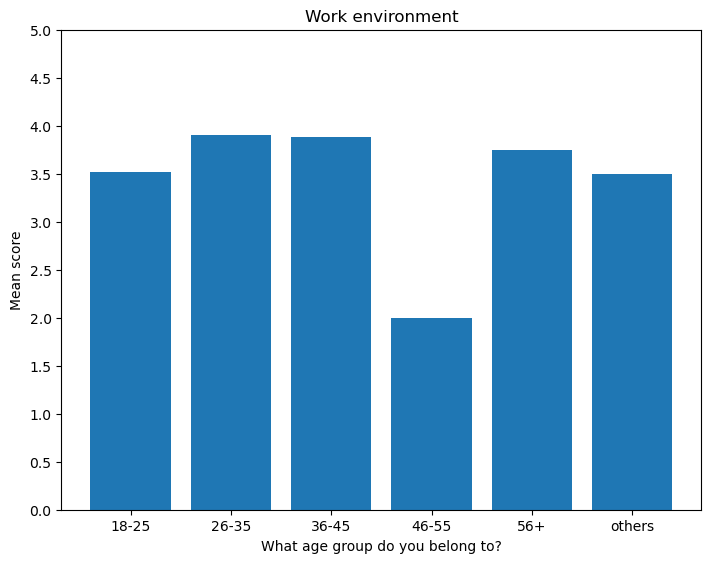

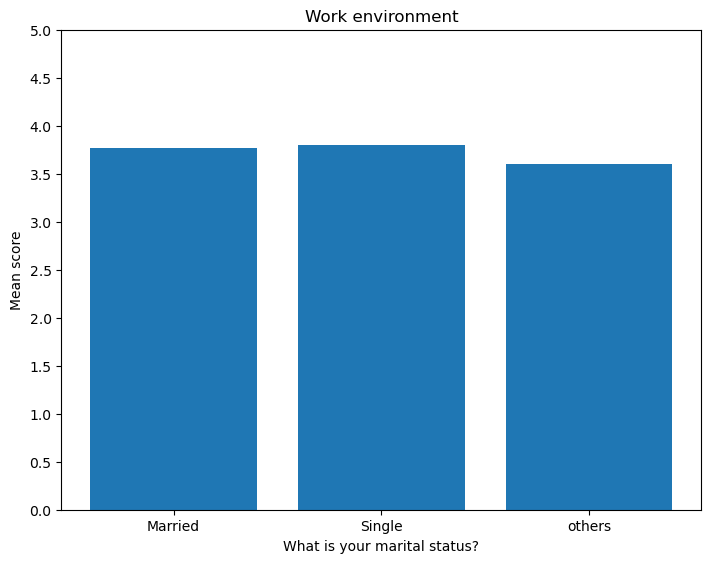

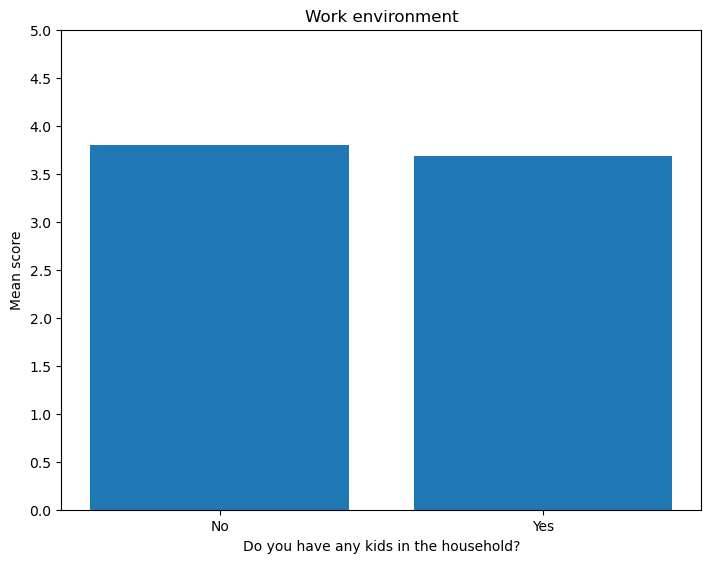

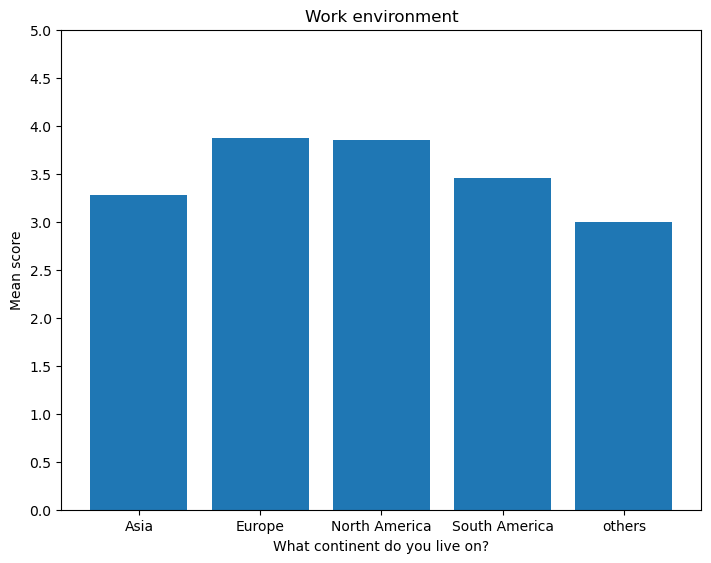

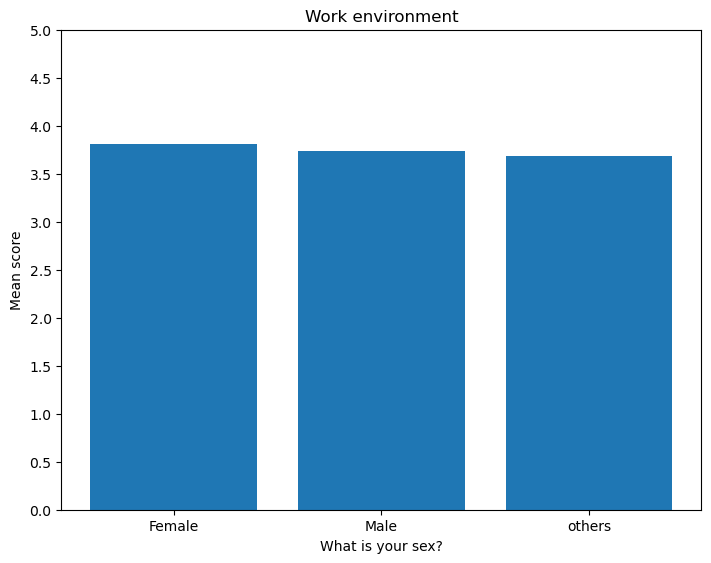

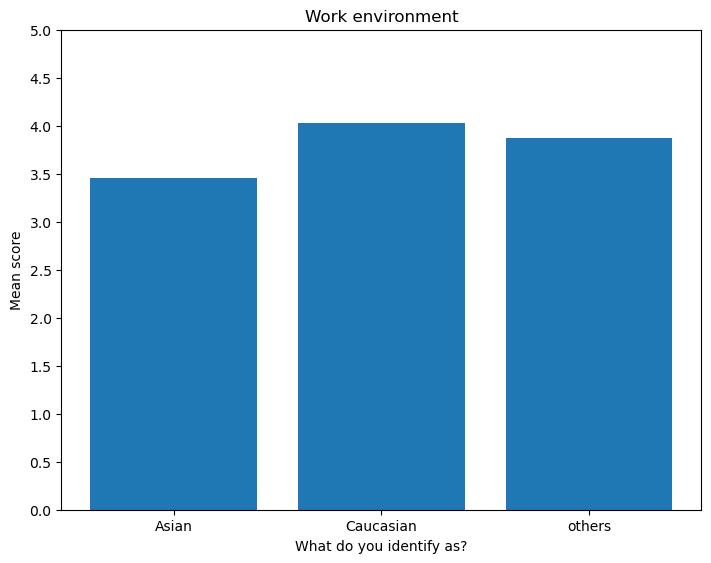

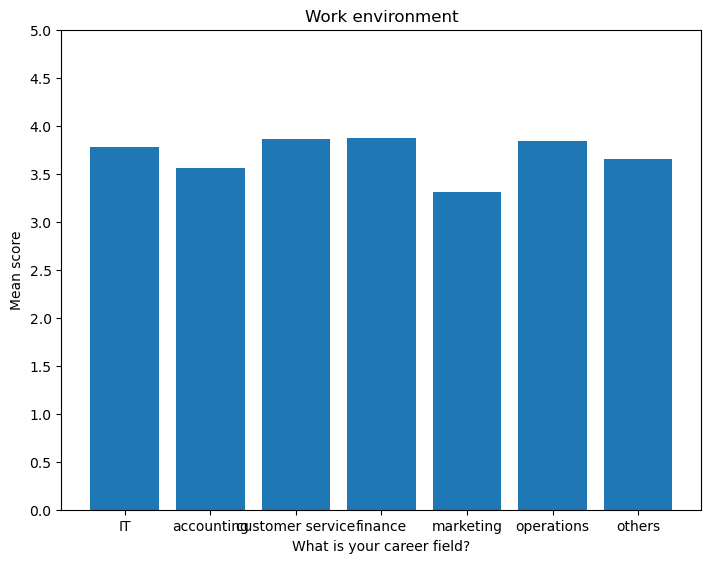

In [280]:
for group_df in group_dfs:
    plot_bar_graph(group_df, "Work environment")

## Time

In [281]:
section_dict = [0, 0, 0, 0, 0]
section_columns = [*range(29, 34, 1)]
section_df = df.iloc[:, section_columns + demographics_columns]
section_df.head(10)

,I feel that working remotely has saved me time from not having to commute.,I feel that working remotely has saved me time from not having to get up early.,I feel that working remotely has saved me time from not having to get home late.,I’m able to work on chores during downtimes at work.,I have more time meeting with friends or going to the gym.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,Strongly Agree,Strongly Agree,Agree,Agree,Agree,18-25,Married,No,North America,Female,Caucasian,IT
1,Strongly Agree,Strongly disagree,Strongly Agree,Strongly Agree,Strongly Agree,18-25,Single,No,North America,Male,others,IT
2,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,36-45,Married,Yes,North America,Male,Caucasian,IT
3,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Agree,26-35,Single,No,North America,Male,Asian,IT
4,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,18-25,Single,No,North America,Male,Caucasian,marketing
5,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Disagree,26-35,Single,No,North America,Male,Caucasian,IT
6,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,26-35,Single,No,North America,Male,Asian,IT
7,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly disagree,26-35,Single,No,North America,Male,Asian,IT
8,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,Disagree,Disagree,Strongly Agree,Strongly Agree,Neutral,36-45,Married,No,Europe,Male,Caucasian,IT


In [282]:
section_df = replace_sentiment_with_numerics(section_dict, section_df)
section_df.head(10)

,I feel that working remotely has saved me time from not having to commute.,I feel that working remotely has saved me time from not having to get up early.,I feel that working remotely has saved me time from not having to get home late.,I’m able to work on chores during downtimes at work.,I have more time meeting with friends or going to the gym.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,5,5,4,4,4,18-25,Married,No,North America,Female,Caucasian,IT
1,5,1,5,5,5,18-25,Single,No,North America,Male,others,IT
2,5,5,5,5,4,36-45,Married,Yes,North America,Male,Caucasian,IT
3,5,5,5,4,4,26-35,Single,No,North America,Male,Asian,IT
4,5,5,5,5,5,18-25,Single,No,North America,Male,Caucasian,marketing
5,5,5,5,2,2,26-35,Single,No,North America,Male,Caucasian,IT
6,5,5,5,5,5,26-35,Single,No,North America,Male,Asian,IT
7,5,5,5,5,1,26-35,Single,No,North America,Male,Asian,IT
8,5,5,5,5,4,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,2,2,5,5,3,36-45,Married,No,Europe,Male,Caucasian,IT


In [283]:
add_total_and_mean_columns(section_df, len(section_dict))
aggregated_df["Time"] = section_df["mean"]
section_df.head(10)

C:\Users\Bowragon\AppData\Local\Temp\ipykernel_3140\3715097988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df["Time"] = section_df["mean"]


,I feel that working remotely has saved me time from not having to commute.,I feel that working remotely has saved me time from not having to get up early.,I feel that working remotely has saved me time from not having to get home late.,I’m able to work on chores during downtimes at work.,I have more time meeting with friends or going to the gym.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?,total,mean
0,5,5,4,4,4,18-25,Married,No,North America,Female,Caucasian,IT,22,4.4
1,5,1,5,5,5,18-25,Single,No,North America,Male,others,IT,21,4.2
2,5,5,5,5,4,36-45,Married,Yes,North America,Male,Caucasian,IT,24,4.8
3,5,5,5,4,4,26-35,Single,No,North America,Male,Asian,IT,23,4.6
4,5,5,5,5,5,18-25,Single,No,North America,Male,Caucasian,marketing,25,5.0
5,5,5,5,2,2,26-35,Single,No,North America,Male,Caucasian,IT,19,3.8
6,5,5,5,5,5,26-35,Single,No,North America,Male,Asian,IT,25,5.0
7,5,5,5,5,1,26-35,Single,No,North America,Male,Asian,IT,21,4.2
8,5,5,5,5,4,26-35,Married,Yes,North America,Female,Caucasian,customer service,24,4.8
9,2,2,5,5,3,36-45,Married,No,Europe,Male,Caucasian,IT,17,3.4


In [284]:
group_dfs = generate_group_dfs(section_df)

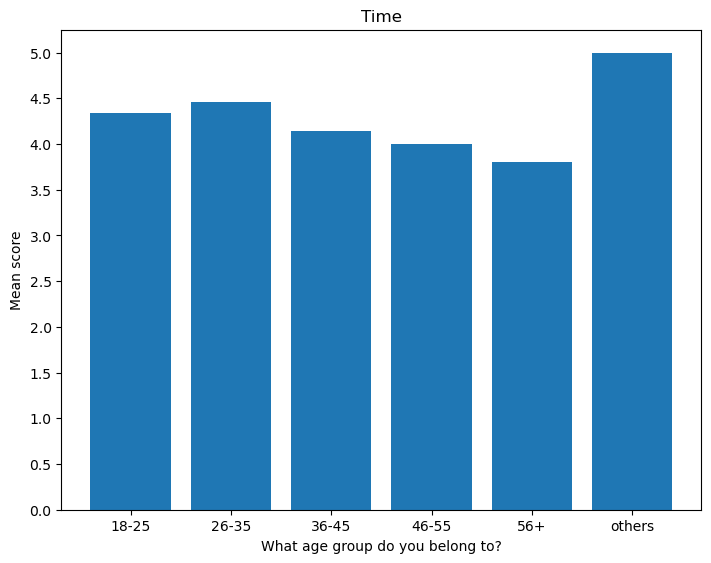

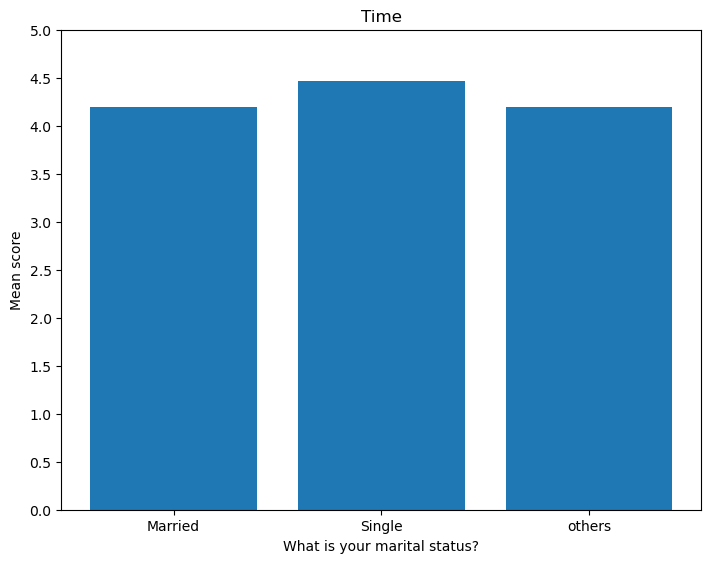

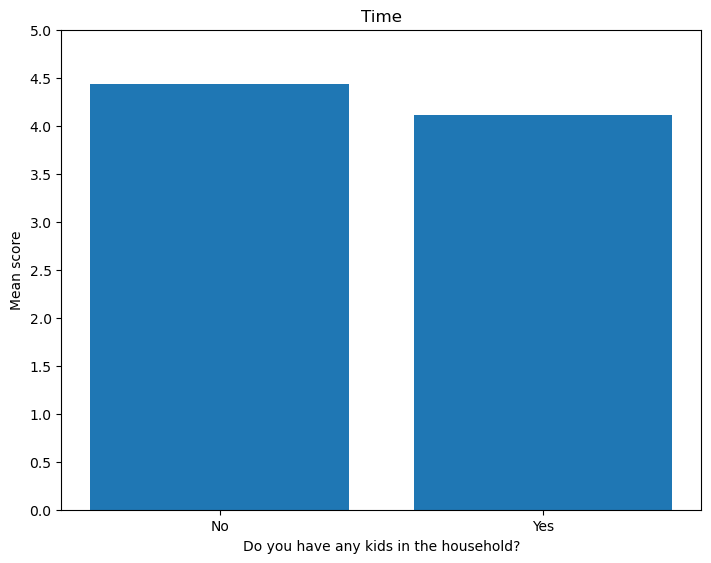

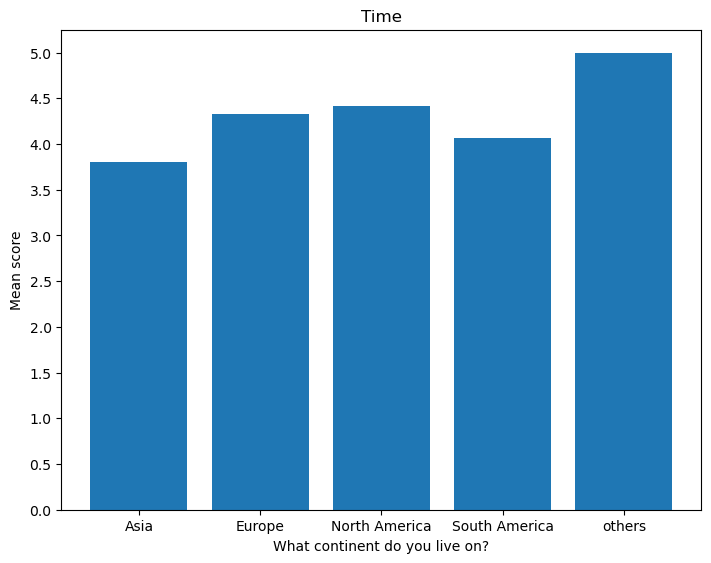

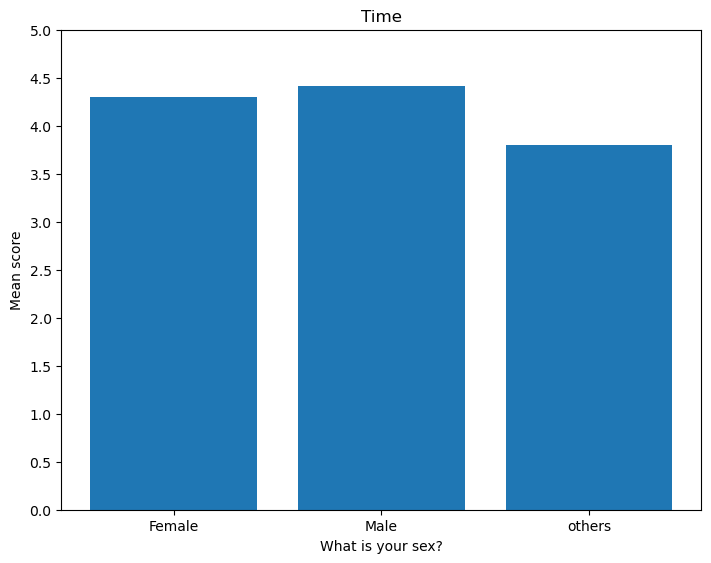

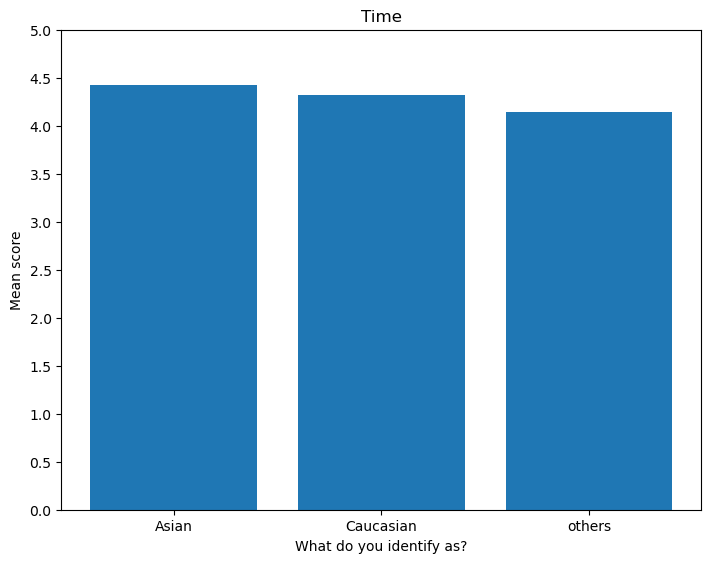

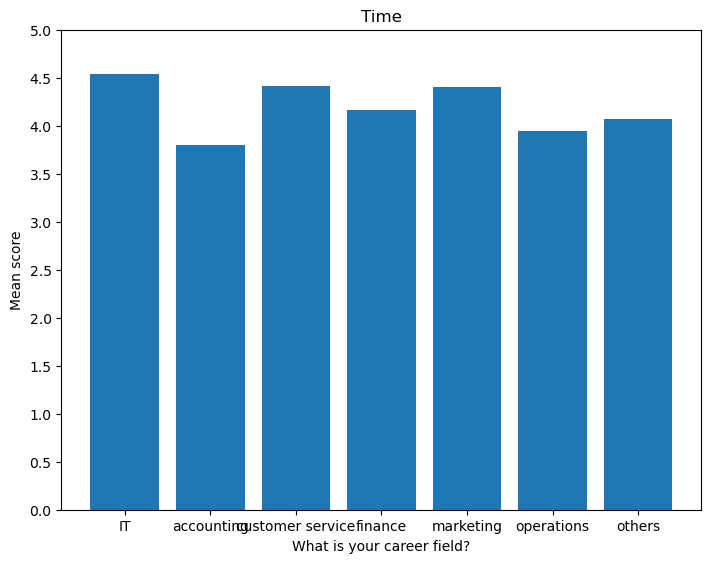

In [285]:
for group_df in group_dfs:
    plot_bar_graph(group_df, "Time")

## Training and career development

In [286]:
section_dict = [1, 1, 0]
section_columns = [*range(34, 37, 1)]
section_df = df.iloc[:, section_columns + demographics_columns]
section_df.head(10)

,I feel that remote work has reduced my chance of being promoted.,I feel that my company is offering less training programs because of remote work.,I am capable of working on personal development and growth when working remotely.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,Neutral,Disagree,Agree,18-25,Married,No,North America,Female,Caucasian,IT
1,Neutral,Disagree,Neutral,18-25,Single,No,North America,Male,others,IT
2,Neutral,Disagree,Agree,36-45,Married,Yes,North America,Male,Caucasian,IT
3,Neutral,Neutral,Agree,26-35,Single,No,North America,Male,Asian,IT
4,Strongly disagree,Strongly disagree,Agree,18-25,Single,No,North America,Male,Caucasian,marketing
5,Disagree,Strongly disagree,Strongly Agree,26-35,Single,No,North America,Male,Caucasian,IT
6,Neutral,Agree,Agree,26-35,Single,No,North America,Male,Asian,IT
7,Strongly disagree,Strongly disagree,Strongly Agree,26-35,Single,No,North America,Male,Asian,IT
8,Disagree,Disagree,Strongly Agree,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,Agree,Agree,Strongly Agree,36-45,Married,No,Europe,Male,Caucasian,IT


In [287]:
section_df = replace_sentiment_with_numerics(section_dict, section_df)
section_df.head(10)

,I feel that remote work has reduced my chance of being promoted.,I feel that my company is offering less training programs because of remote work.,I am capable of working on personal development and growth when working remotely.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,3,4,4,18-25,Married,No,North America,Female,Caucasian,IT
1,3,4,3,18-25,Single,No,North America,Male,others,IT
2,3,4,4,36-45,Married,Yes,North America,Male,Caucasian,IT
3,3,3,4,26-35,Single,No,North America,Male,Asian,IT
4,5,5,4,18-25,Single,No,North America,Male,Caucasian,marketing
5,4,5,5,26-35,Single,No,North America,Male,Caucasian,IT
6,3,2,4,26-35,Single,No,North America,Male,Asian,IT
7,5,5,5,26-35,Single,No,North America,Male,Asian,IT
8,4,4,5,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,2,2,5,36-45,Married,No,Europe,Male,Caucasian,IT


In [288]:
add_total_and_mean_columns(section_df, len(section_dict))
aggregated_df["Training \nand career \ndevelopment"] = section_df["mean"]
section_df.head(10)

C:\Users\Bowragon\AppData\Local\Temp\ipykernel_3140\3698785319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df["Training \nand career \ndevelopment"] = section_df["mean"]


,I feel that remote work has reduced my chance of being promoted.,I feel that my company is offering less training programs because of remote work.,I am capable of working on personal development and growth when working remotely.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?,total,mean
0,3,4,4,18-25,Married,No,North America,Female,Caucasian,IT,11,3.666667
1,3,4,3,18-25,Single,No,North America,Male,others,IT,10,3.333333
2,3,4,4,36-45,Married,Yes,North America,Male,Caucasian,IT,11,3.666667
3,3,3,4,26-35,Single,No,North America,Male,Asian,IT,10,3.333333
4,5,5,4,18-25,Single,No,North America,Male,Caucasian,marketing,14,4.666667
5,4,5,5,26-35,Single,No,North America,Male,Caucasian,IT,14,4.666667
6,3,2,4,26-35,Single,No,North America,Male,Asian,IT,9,3.000000
7,5,5,5,26-35,Single,No,North America,Male,Asian,IT,15,5.000000
8,4,4,5,26-35,Married,Yes,North America,Female,Caucasian,customer service,13,4.333333
9,2,2,5,36-45,Married,No,Europe,Male,Caucasian,IT,9,3.000000


In [289]:
group_dfs = generate_group_dfs(section_df)

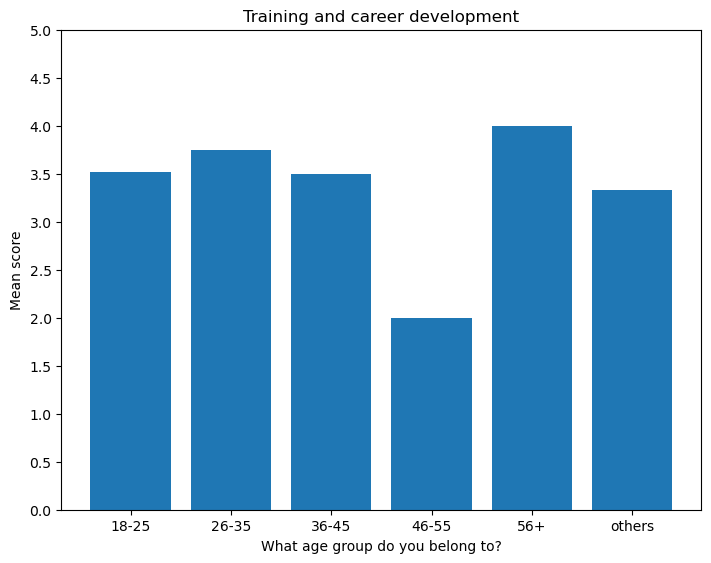

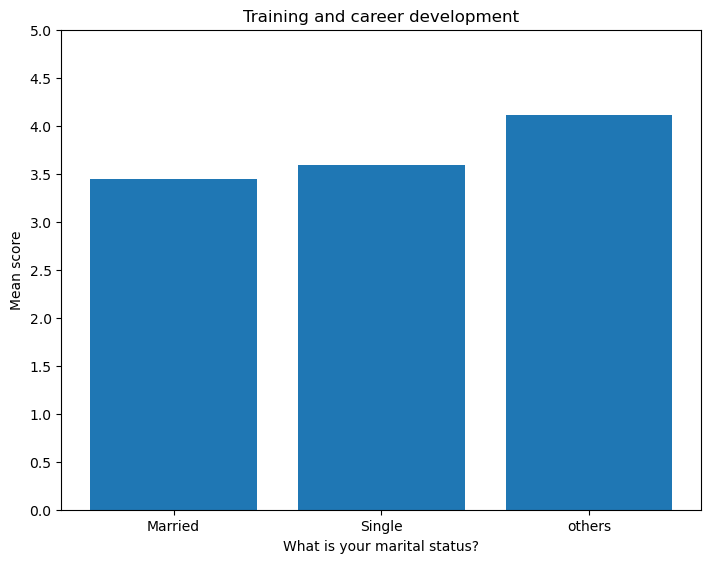

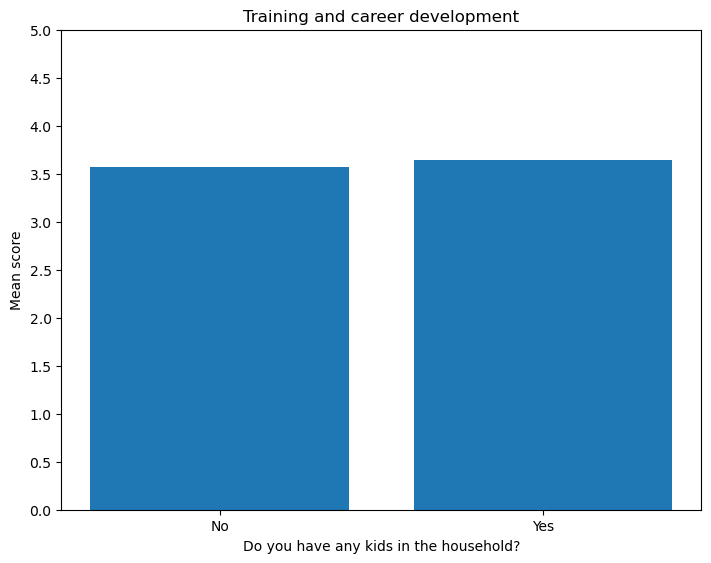

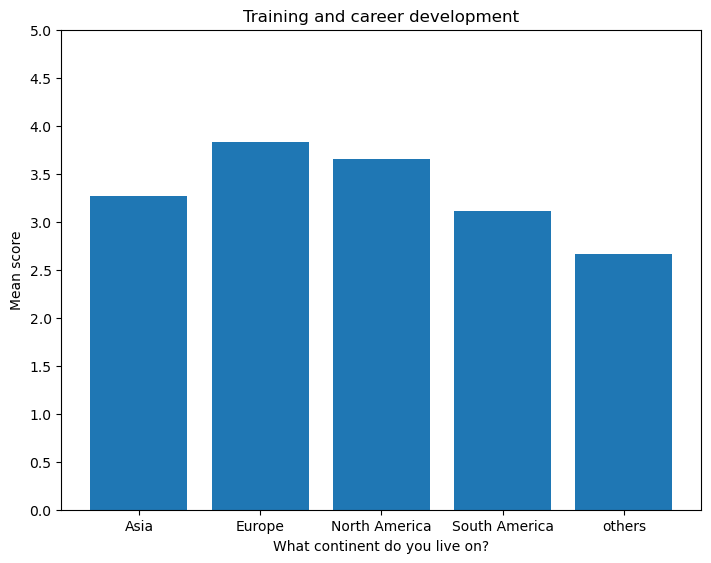

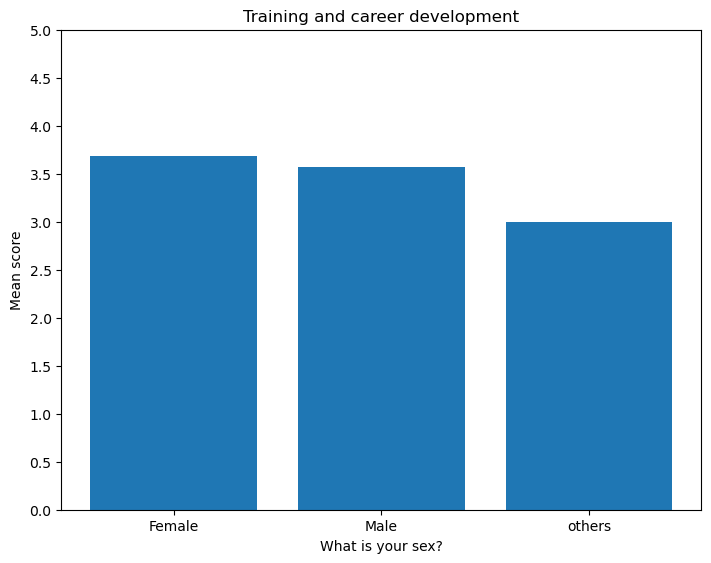

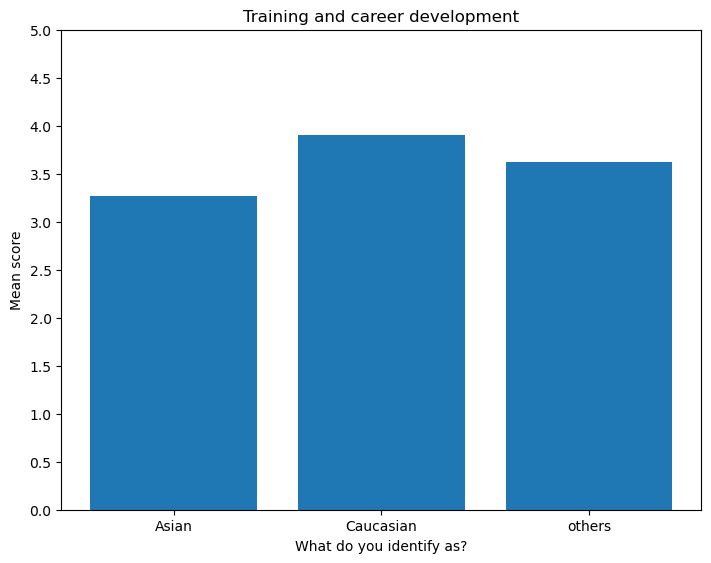

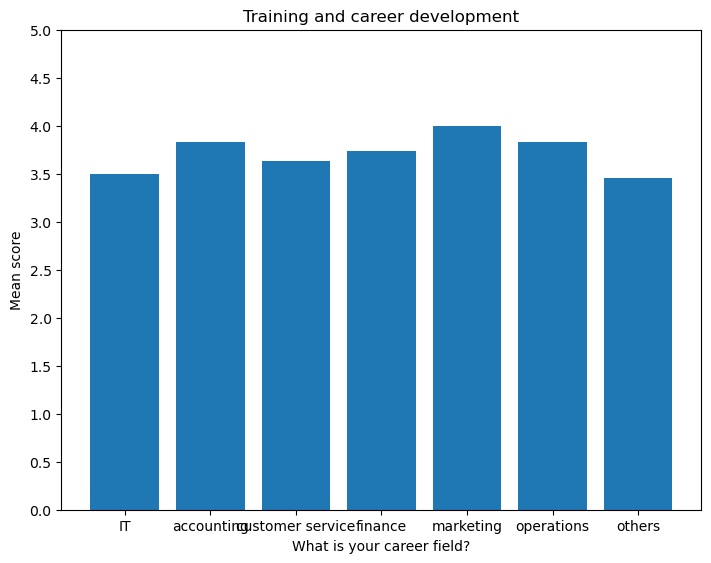

In [290]:
for group_df in group_dfs:
    plot_bar_graph(group_df, "Training and career development")

## Physical health

In [291]:
section_dict = [1, 0, 0, 1, 0]
section_columns = [*range(37, 42, 1)]
section_df = df.iloc[:, section_columns + demographics_columns]
section_df.head(10)

,I feel that my physical condition has decreased as a result of not going out to work everyday.,I have more time to spend on physical activities as a result of remote work.,My diet improves when I’m working from home.,I spend less time grooming myself when I’m working from home.,My workspace is ergonomic.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,Neutral,Agree,Strongly Agree,Agree,Disagree,18-25,Married,No,North America,Female,Caucasian,IT
1,Strongly disagree,Strongly Agree,Strongly Agree,Strongly disagree,Neutral,18-25,Single,No,North America,Male,others,IT
2,Neutral,Neutral,Agree,Agree,Neutral,36-45,Married,Yes,North America,Male,Caucasian,IT
3,Disagree,Agree,Neutral,Disagree,Agree,26-35,Single,No,North America,Male,Asian,IT
4,Strongly Agree,Disagree,Neutral,Neutral,Neutral,18-25,Single,No,North America,Male,Caucasian,marketing
5,Neutral,Agree,Strongly Agree,Neutral,Agree,26-35,Single,No,North America,Male,Caucasian,IT
6,Neutral,Agree,Strongly Agree,Agree,Agree,26-35,Single,No,North America,Male,Asian,IT
7,Strongly disagree,Strongly Agree,Strongly Agree,Strongly disagree,Strongly disagree,26-35,Single,No,North America,Male,Asian,IT
8,Disagree,Agree,Agree,Agree,Agree,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,Strongly Agree,Agree,Neutral,Neutral,Strongly Agree,36-45,Married,No,Europe,Male,Caucasian,IT


In [292]:
section_df = replace_sentiment_with_numerics(section_dict, section_df)
section_df.head(10)

,I feel that my physical condition has decreased as a result of not going out to work everyday.,I have more time to spend on physical activities as a result of remote work.,My diet improves when I’m working from home.,I spend less time grooming myself when I’m working from home.,My workspace is ergonomic.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,3,4,5,2,2,18-25,Married,No,North America,Female,Caucasian,IT
1,5,5,5,5,3,18-25,Single,No,North America,Male,others,IT
2,3,3,4,2,3,36-45,Married,Yes,North America,Male,Caucasian,IT
3,4,4,3,4,4,26-35,Single,No,North America,Male,Asian,IT
4,1,2,3,3,3,18-25,Single,No,North America,Male,Caucasian,marketing
5,3,4,5,3,4,26-35,Single,No,North America,Male,Caucasian,IT
6,3,4,5,2,4,26-35,Single,No,North America,Male,Asian,IT
7,5,5,5,5,1,26-35,Single,No,North America,Male,Asian,IT
8,4,4,4,2,4,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,1,4,3,3,5,36-45,Married,No,Europe,Male,Caucasian,IT


In [293]:
add_total_and_mean_columns(section_df, len(section_dict))
aggregated_df["Physical \nhealth"] = section_df["mean"]
section_df.head(10)

C:\Users\Bowragon\AppData\Local\Temp\ipykernel_3140\1456582108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df["Physical \nhealth"] = section_df["mean"]


,I feel that my physical condition has decreased as a result of not going out to work everyday.,I have more time to spend on physical activities as a result of remote work.,My diet improves when I’m working from home.,I spend less time grooming myself when I’m working from home.,My workspace is ergonomic.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?,total,mean
0,3,4,5,2,2,18-25,Married,No,North America,Female,Caucasian,IT,16,3.2
1,5,5,5,5,3,18-25,Single,No,North America,Male,others,IT,23,4.6
2,3,3,4,2,3,36-45,Married,Yes,North America,Male,Caucasian,IT,15,3.0
3,4,4,3,4,4,26-35,Single,No,North America,Male,Asian,IT,19,3.8
4,1,2,3,3,3,18-25,Single,No,North America,Male,Caucasian,marketing,12,2.4
5,3,4,5,3,4,26-35,Single,No,North America,Male,Caucasian,IT,19,3.8
6,3,4,5,2,4,26-35,Single,No,North America,Male,Asian,IT,18,3.6
7,5,5,5,5,1,26-35,Single,No,North America,Male,Asian,IT,21,4.2
8,4,4,4,2,4,26-35,Married,Yes,North America,Female,Caucasian,customer service,18,3.6
9,1,4,3,3,5,36-45,Married,No,Europe,Male,Caucasian,IT,16,3.2


In [294]:
group_dfs = generate_group_dfs(section_df)

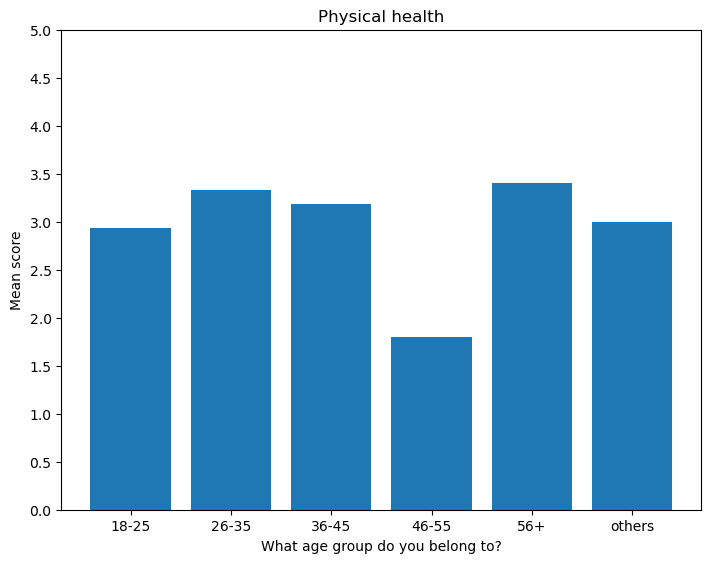

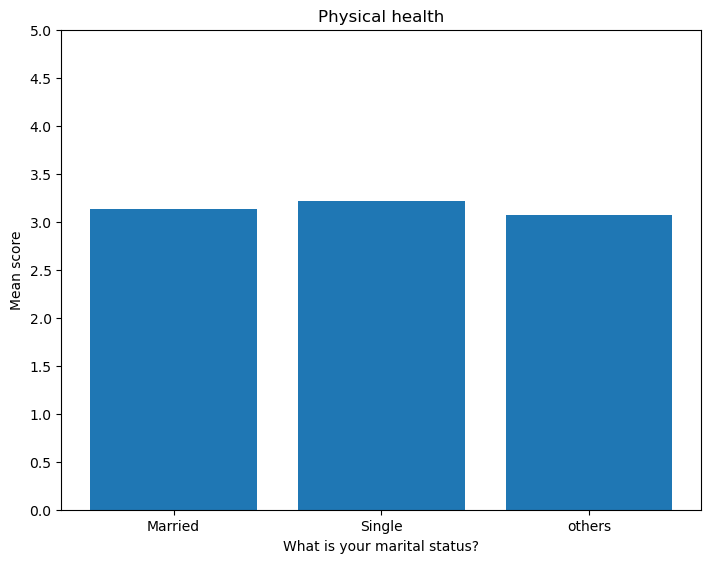

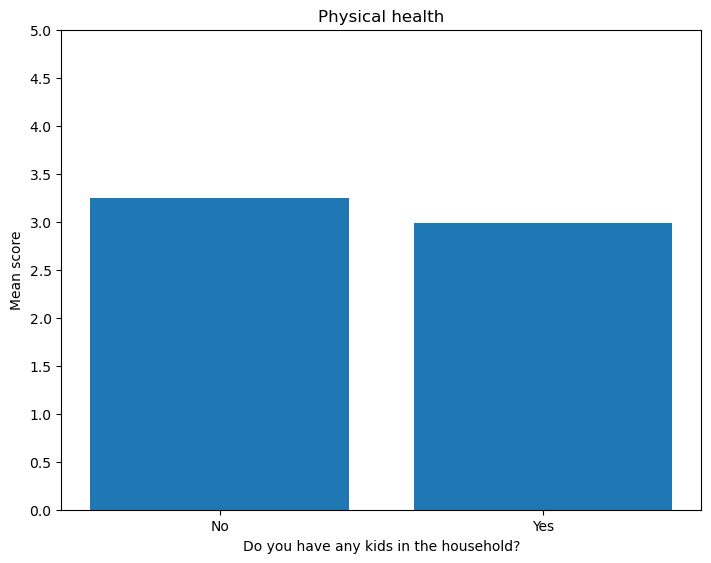

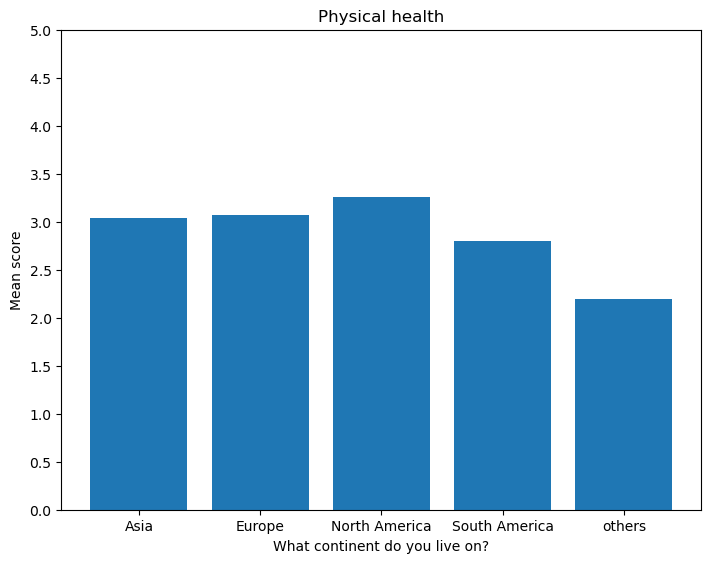

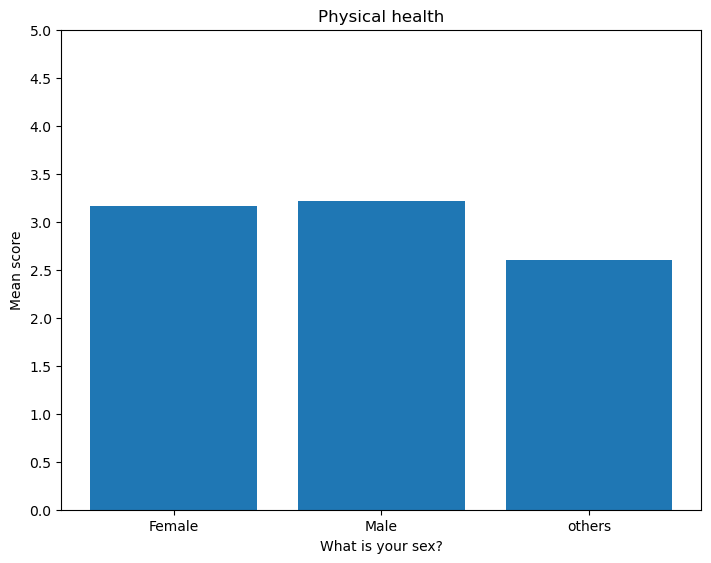

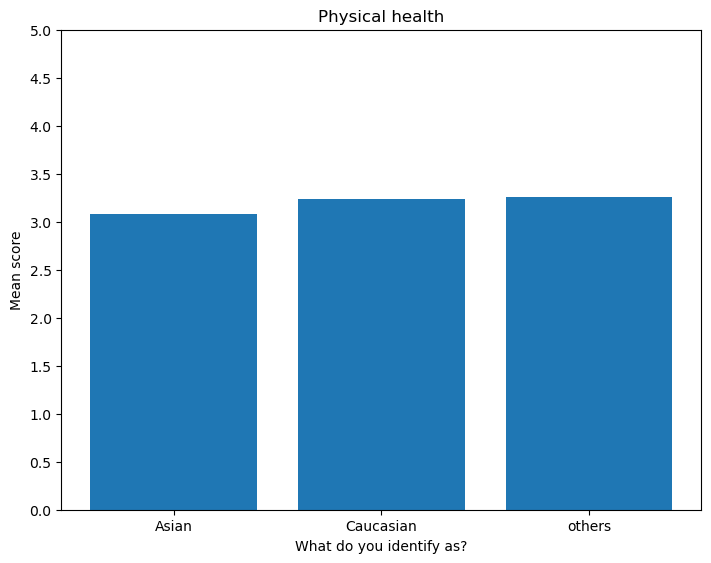

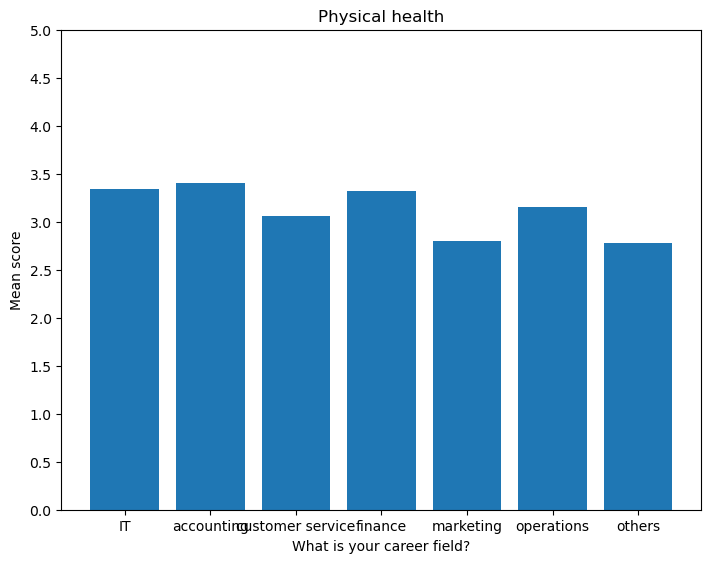

In [295]:
for group_df in group_dfs:
    plot_bar_graph(group_df, "Physical health")

## Pay

In [296]:
section_dict = [1, 1, 1, 1]
section_columns = [*range(42, 46, 1)]
section_df = df.iloc[:, section_columns + demographics_columns]
section_df.head(10)

,My company has cut my pay as a result of remote work.,I’m forced to transition to part time as a result of remote work.,I believe my raise was reduced as a result of remote work.,I believe my bonus was cut as a result of remote work.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,Neutral,Disagree,Disagree,Disagree,18-25,Married,No,North America,Female,Caucasian,IT
1,Strongly disagree,Disagree,Neutral,Neutral,18-25,Single,No,North America,Male,others,IT
2,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,36-45,Married,Yes,North America,Male,Caucasian,IT
3,Disagree,Disagree,Disagree,Disagree,26-35,Single,No,North America,Male,Asian,IT
4,Strongly disagree,Strongly disagree,Neutral,Neutral,18-25,Single,No,North America,Male,Caucasian,marketing
5,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,26-35,Single,No,North America,Male,Caucasian,IT
6,Neutral,Disagree,Neutral,Neutral,26-35,Single,No,North America,Male,Asian,IT
7,Strongly disagree,Strongly disagree,Strongly Agree,Strongly Agree,26-35,Single,No,North America,Male,Asian,IT
8,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,Neutral,Strongly disagree,Strongly disagree,Strongly disagree,36-45,Married,No,Europe,Male,Caucasian,IT


In [297]:
section_df = replace_sentiment_with_numerics(section_dict, section_df)
section_df.head(10)

,My company has cut my pay as a result of remote work.,I’m forced to transition to part time as a result of remote work.,I believe my raise was reduced as a result of remote work.,I believe my bonus was cut as a result of remote work.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,3,4,4,4,18-25,Married,No,North America,Female,Caucasian,IT
1,5,4,3,3,18-25,Single,No,North America,Male,others,IT
2,5,5,5,5,36-45,Married,Yes,North America,Male,Caucasian,IT
3,4,4,4,4,26-35,Single,No,North America,Male,Asian,IT
4,5,5,3,3,18-25,Single,No,North America,Male,Caucasian,marketing
5,5,5,5,5,26-35,Single,No,North America,Male,Caucasian,IT
6,3,4,3,3,26-35,Single,No,North America,Male,Asian,IT
7,5,5,1,1,26-35,Single,No,North America,Male,Asian,IT
8,5,5,5,5,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,3,5,5,5,36-45,Married,No,Europe,Male,Caucasian,IT


In [298]:
add_total_and_mean_columns(section_df, len(section_dict))
aggregated_df["Pay"] = section_df["mean"]
section_df.head(10)

C:\Users\Bowragon\AppData\Local\Temp\ipykernel_3140\2419454798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df["Pay"] = section_df["mean"]


,My company has cut my pay as a result of remote work.,I’m forced to transition to part time as a result of remote work.,I believe my raise was reduced as a result of remote work.,I believe my bonus was cut as a result of remote work.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?,total,mean
0,3,4,4,4,18-25,Married,No,North America,Female,Caucasian,IT,15,3.75
1,5,4,3,3,18-25,Single,No,North America,Male,others,IT,15,3.75
2,5,5,5,5,36-45,Married,Yes,North America,Male,Caucasian,IT,20,5.00
3,4,4,4,4,26-35,Single,No,North America,Male,Asian,IT,16,4.00
4,5,5,3,3,18-25,Single,No,North America,Male,Caucasian,marketing,16,4.00
5,5,5,5,5,26-35,Single,No,North America,Male,Caucasian,IT,20,5.00
6,3,4,3,3,26-35,Single,No,North America,Male,Asian,IT,13,3.25
7,5,5,1,1,26-35,Single,No,North America,Male,Asian,IT,12,3.00
8,5,5,5,5,26-35,Married,Yes,North America,Female,Caucasian,customer service,20,5.00
9,3,5,5,5,36-45,Married,No,Europe,Male,Caucasian,IT,18,4.50


In [299]:
group_dfs = generate_group_dfs(section_df)

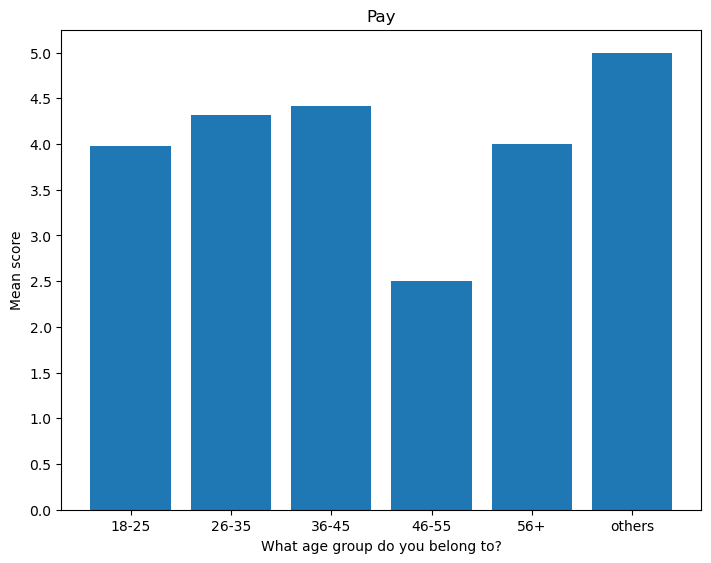

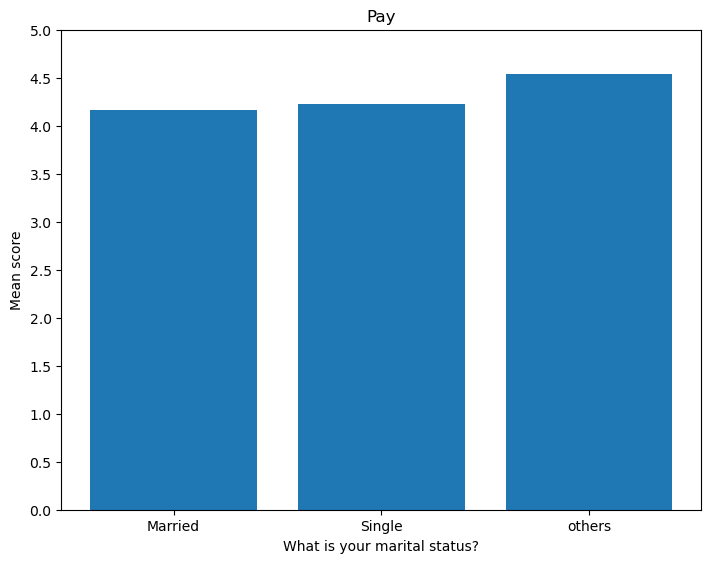

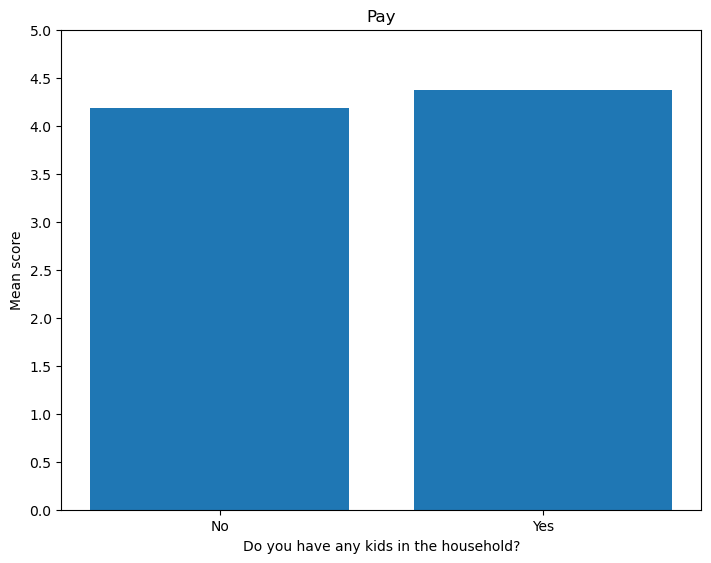

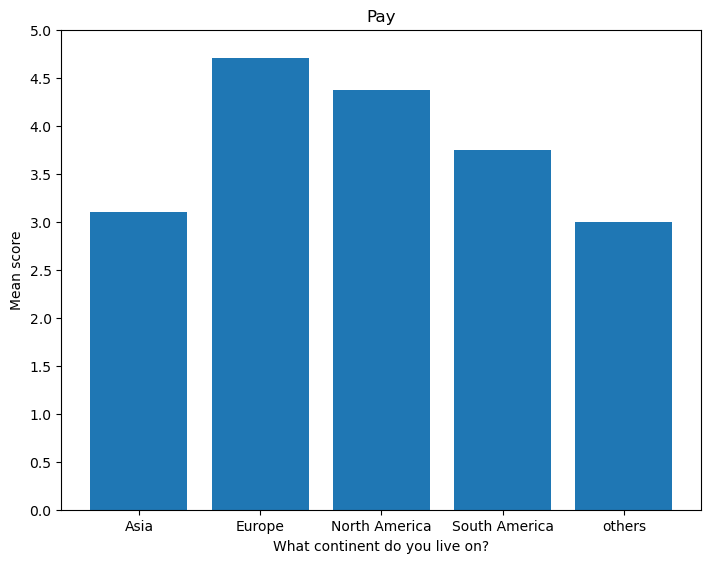

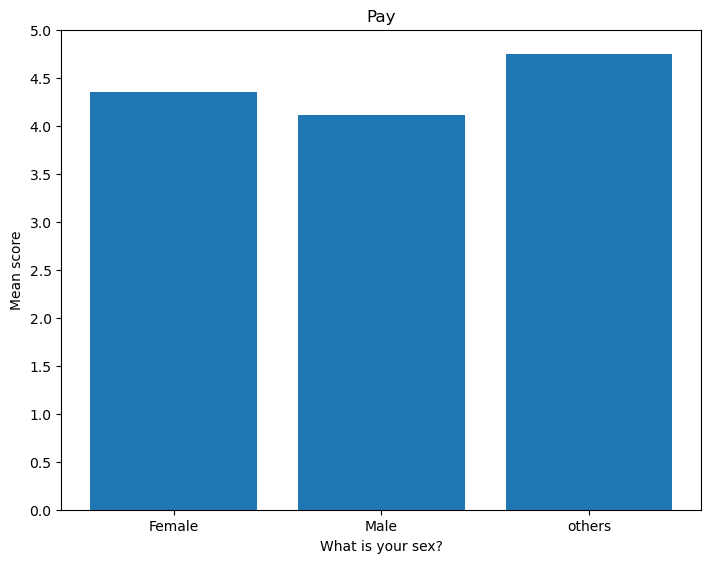

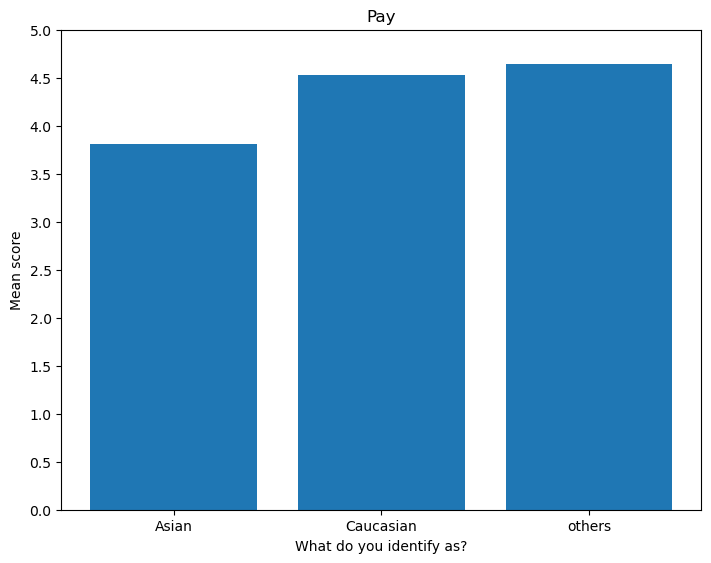

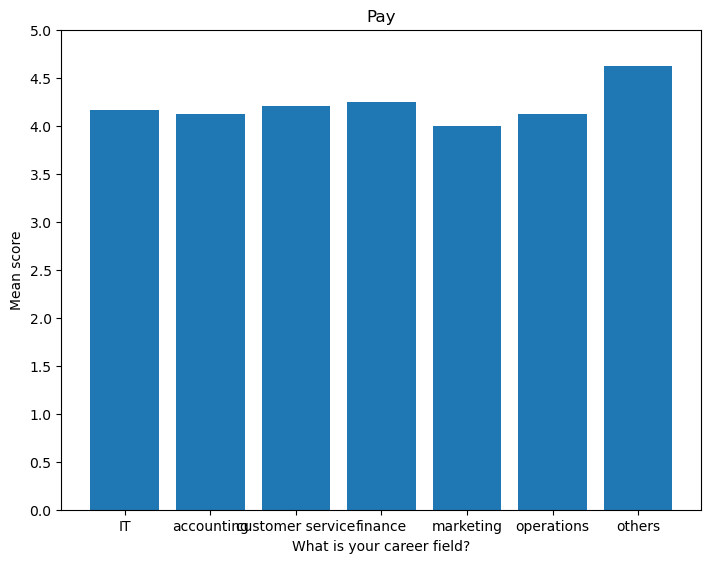

In [300]:
for group_df in group_dfs:
    plot_bar_graph(group_df, "Pay")

## Tooling

In [301]:
section_dict = [1, 1, 0]
section_columns = [*range(46, 49, 1)]
section_df = df.iloc[:, section_columns + demographics_columns]
section_df.head(10)

,I had a difficult time arranging together my work station for remote work.,I had a difficult time installing appropriate communication tools for my remote work.,The tools provided were good enough for my work purposes.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,Neutral,Strongly disagree,Agree,18-25,Married,No,North America,Female,Caucasian,IT
1,Neutral,Strongly disagree,Strongly Agree,18-25,Single,No,North America,Male,others,IT
2,Disagree,Disagree,Agree,36-45,Married,Yes,North America,Male,Caucasian,IT
3,Disagree,Agree,Agree,26-35,Single,No,North America,Male,Asian,IT
4,Neutral,Strongly disagree,Strongly Agree,18-25,Single,No,North America,Male,Caucasian,marketing
5,Strongly disagree,Strongly disagree,Strongly Agree,26-35,Single,No,North America,Male,Caucasian,IT
6,Disagree,Disagree,Agree,26-35,Single,No,North America,Male,Asian,IT
7,Strongly disagree,Strongly disagree,Strongly Agree,26-35,Single,No,North America,Male,Asian,IT
8,Strongly disagree,Strongly disagree,Agree,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,Strongly disagree,Strongly disagree,Strongly Agree,36-45,Married,No,Europe,Male,Caucasian,IT


In [302]:
section_df = replace_sentiment_with_numerics(section_dict, section_df)
section_df.head(10)

,I had a difficult time arranging together my work station for remote work.,I had a difficult time installing appropriate communication tools for my remote work.,The tools provided were good enough for my work purposes.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,3,5,4,18-25,Married,No,North America,Female,Caucasian,IT
1,3,5,5,18-25,Single,No,North America,Male,others,IT
2,4,4,4,36-45,Married,Yes,North America,Male,Caucasian,IT
3,4,2,4,26-35,Single,No,North America,Male,Asian,IT
4,3,5,5,18-25,Single,No,North America,Male,Caucasian,marketing
5,5,5,5,26-35,Single,No,North America,Male,Caucasian,IT
6,4,4,4,26-35,Single,No,North America,Male,Asian,IT
7,5,5,5,26-35,Single,No,North America,Male,Asian,IT
8,5,5,4,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,5,5,5,36-45,Married,No,Europe,Male,Caucasian,IT


In [303]:
add_total_and_mean_columns(section_df, len(section_dict))
aggregated_df["Tooling"] = section_df["mean"]
section_df.head(10)

C:\Users\Bowragon\AppData\Local\Temp\ipykernel_3140\1486260139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df["Tooling"] = section_df["mean"]


,I had a difficult time arranging together my work station for remote work.,I had a difficult time installing appropriate communication tools for my remote work.,The tools provided were good enough for my work purposes.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?,total,mean
0,3,5,4,18-25,Married,No,North America,Female,Caucasian,IT,12,4.000000
1,3,5,5,18-25,Single,No,North America,Male,others,IT,13,4.333333
2,4,4,4,36-45,Married,Yes,North America,Male,Caucasian,IT,12,4.000000
3,4,2,4,26-35,Single,No,North America,Male,Asian,IT,10,3.333333
4,3,5,5,18-25,Single,No,North America,Male,Caucasian,marketing,13,4.333333
5,5,5,5,26-35,Single,No,North America,Male,Caucasian,IT,15,5.000000
6,4,4,4,26-35,Single,No,North America,Male,Asian,IT,12,4.000000
7,5,5,5,26-35,Single,No,North America,Male,Asian,IT,15,5.000000
8,5,5,4,26-35,Married,Yes,North America,Female,Caucasian,customer service,14,4.666667
9,5,5,5,36-45,Married,No,Europe,Male,Caucasian,IT,15,5.000000


In [304]:
group_dfs = generate_group_dfs(section_df)

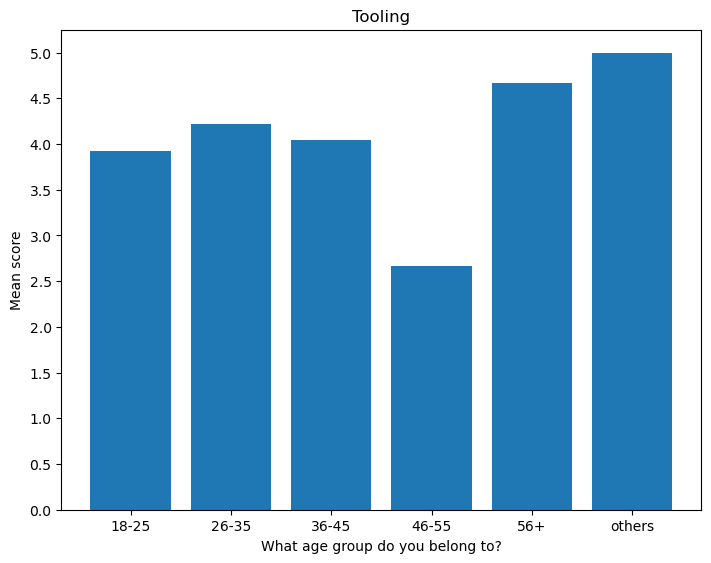

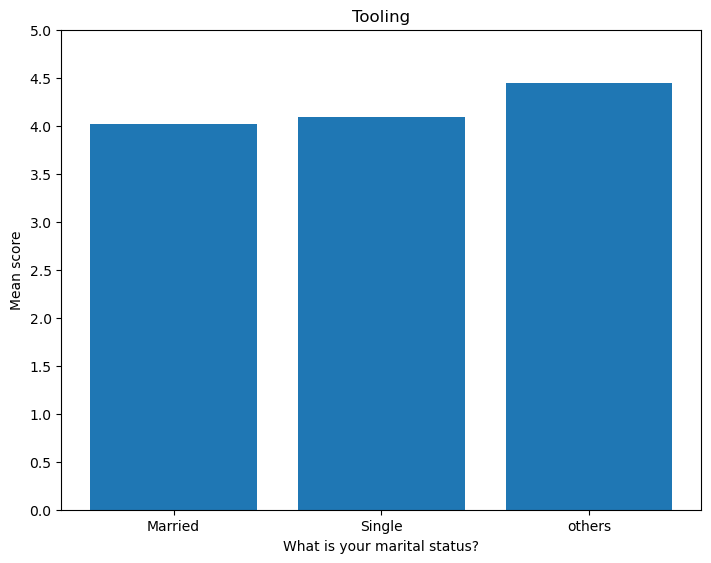

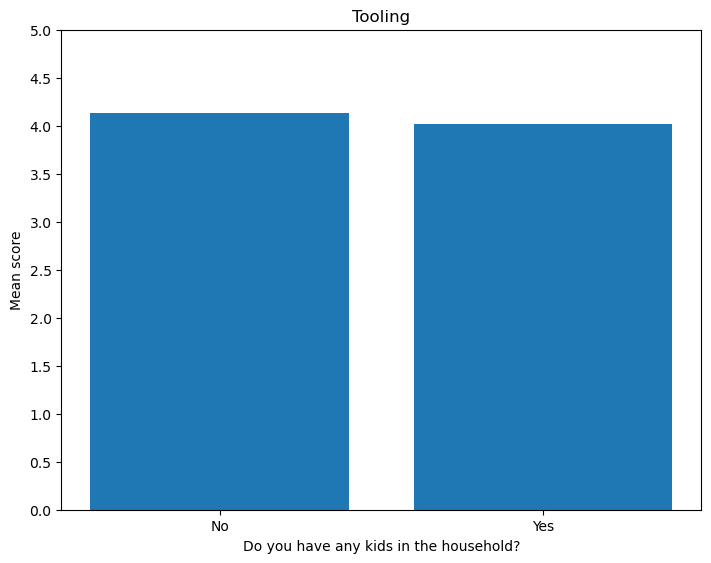

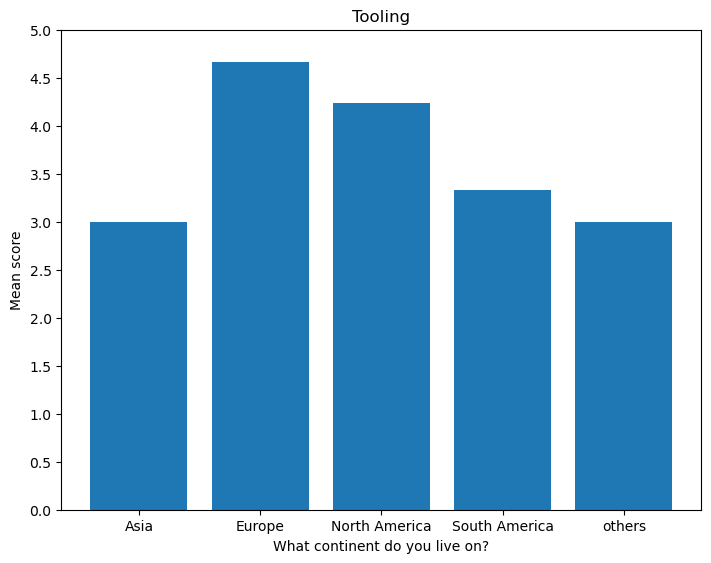

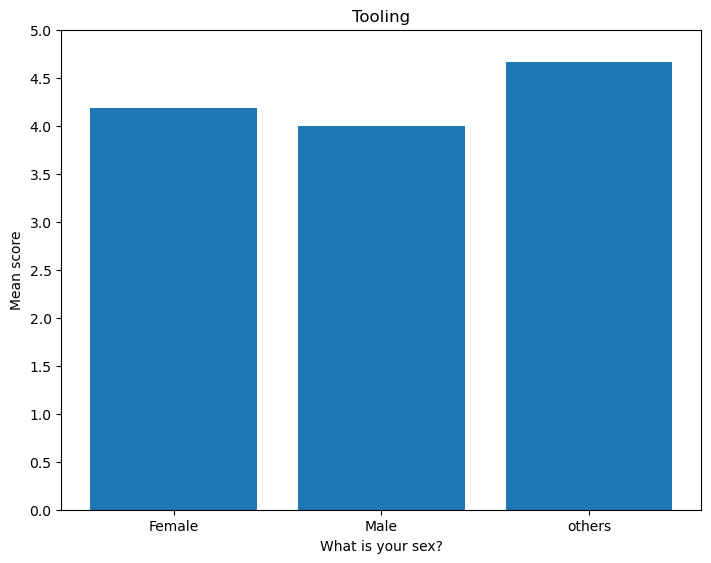

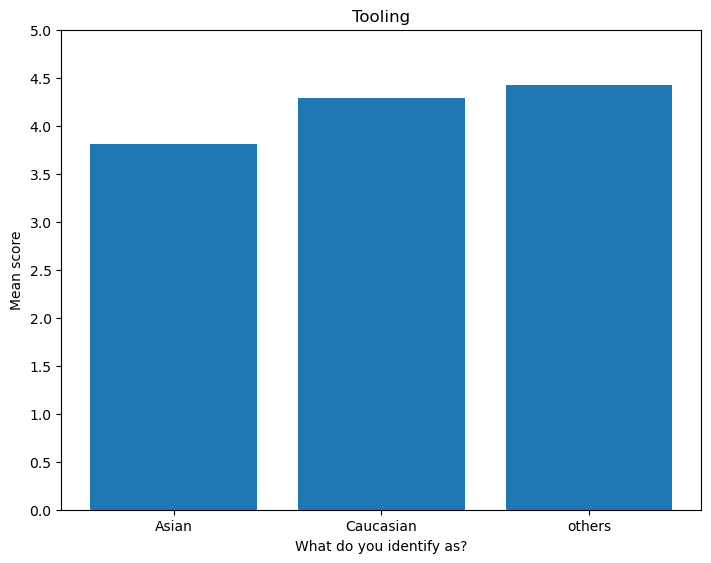

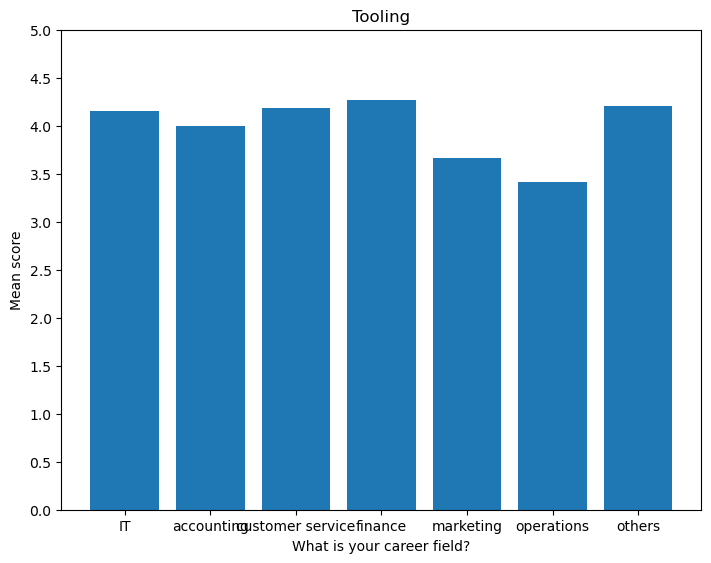

In [305]:
for group_df in group_dfs:
    plot_bar_graph(group_df, "Tooling")

## Process and support

In [306]:
section_dict = [0, 0, 0, 0]
section_columns = [*range(49, 53, 1)]
section_df = df.iloc[:, section_columns + demographics_columns]
section_df.head(10)

,I received plenty of support from my supervisor during my remote work.,I received plenty of support from my coworkers during my remote work.,The IT support was easy to reach during my remote work.,The IT support was able to solve my problems during my remote work.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,Neutral,Agree,Neutral,Agree,18-25,Married,No,North America,Female,Caucasian,IT
1,Strongly disagree,Strongly Agree,Strongly Agree,Strongly Agree,18-25,Single,No,North America,Male,others,IT
2,Agree,Strongly Agree,Strongly Agree,Strongly Agree,36-45,Married,Yes,North America,Male,Caucasian,IT
3,Agree,Agree,Neutral,Neutral,26-35,Single,No,North America,Male,Asian,IT
4,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,18-25,Single,No,North America,Male,Caucasian,marketing
5,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,26-35,Single,No,North America,Male,Caucasian,IT
6,Agree,Agree,Agree,Agree,26-35,Single,No,North America,Male,Asian,IT
7,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,26-35,Single,No,North America,Male,Asian,IT
8,Agree,Agree,Disagree,Agree,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,Strongly Agree,Agree,Strongly Agree,Strongly Agree,36-45,Married,No,Europe,Male,Caucasian,IT


In [307]:
section_df = replace_sentiment_with_numerics(section_dict, section_df)
section_df.head(10)

,I received plenty of support from my supervisor during my remote work.,I received plenty of support from my coworkers during my remote work.,The IT support was easy to reach during my remote work.,The IT support was able to solve my problems during my remote work.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?
0,3,4,3,4,18-25,Married,No,North America,Female,Caucasian,IT
1,1,5,5,5,18-25,Single,No,North America,Male,others,IT
2,4,5,5,5,36-45,Married,Yes,North America,Male,Caucasian,IT
3,4,4,3,3,26-35,Single,No,North America,Male,Asian,IT
4,5,5,5,5,18-25,Single,No,North America,Male,Caucasian,marketing
5,5,5,5,5,26-35,Single,No,North America,Male,Caucasian,IT
6,4,4,4,4,26-35,Single,No,North America,Male,Asian,IT
7,5,5,5,5,26-35,Single,No,North America,Male,Asian,IT
8,4,4,2,4,26-35,Married,Yes,North America,Female,Caucasian,customer service
9,5,4,5,5,36-45,Married,No,Europe,Male,Caucasian,IT


In [308]:
add_total_and_mean_columns(section_df, len(section_dict))
aggregated_df["Process \nand support"] = section_df["mean"]
section_df.head(10)

C:\Users\Bowragon\AppData\Local\Temp\ipykernel_3140\3163485016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_df["Process \nand support"] = section_df["mean"]


,I received plenty of support from my supervisor during my remote work.,I received plenty of support from my coworkers during my remote work.,The IT support was easy to reach during my remote work.,The IT support was able to solve my problems during my remote work.,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?,total,mean
0,3,4,3,4,18-25,Married,No,North America,Female,Caucasian,IT,14,3.50
1,1,5,5,5,18-25,Single,No,North America,Male,others,IT,16,4.00
2,4,5,5,5,36-45,Married,Yes,North America,Male,Caucasian,IT,19,4.75
3,4,4,3,3,26-35,Single,No,North America,Male,Asian,IT,14,3.50
4,5,5,5,5,18-25,Single,No,North America,Male,Caucasian,marketing,20,5.00
5,5,5,5,5,26-35,Single,No,North America,Male,Caucasian,IT,20,5.00
6,4,4,4,4,26-35,Single,No,North America,Male,Asian,IT,16,4.00
7,5,5,5,5,26-35,Single,No,North America,Male,Asian,IT,20,5.00
8,4,4,2,4,26-35,Married,Yes,North America,Female,Caucasian,customer service,14,3.50
9,5,4,5,5,36-45,Married,No,Europe,Male,Caucasian,IT,19,4.75


In [309]:
group_dfs = generate_group_dfs(section_df)

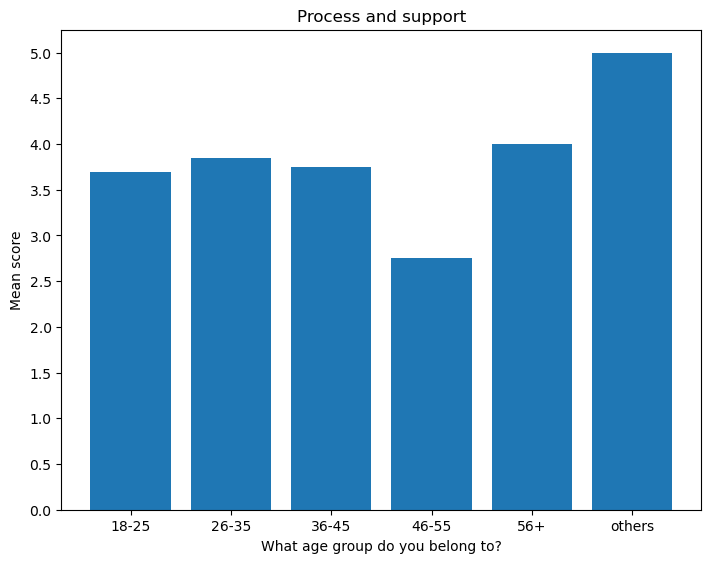

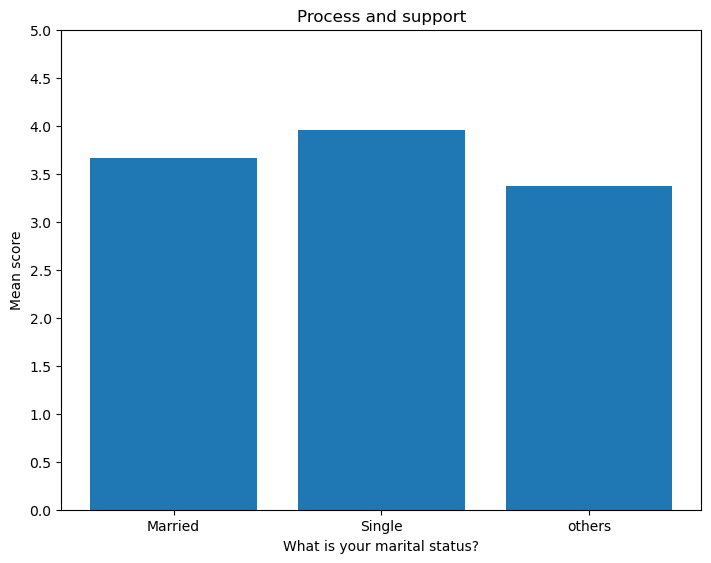

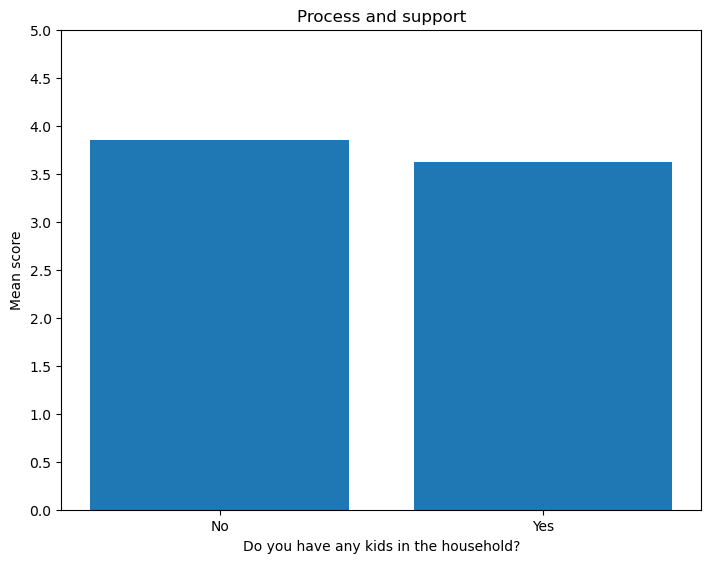

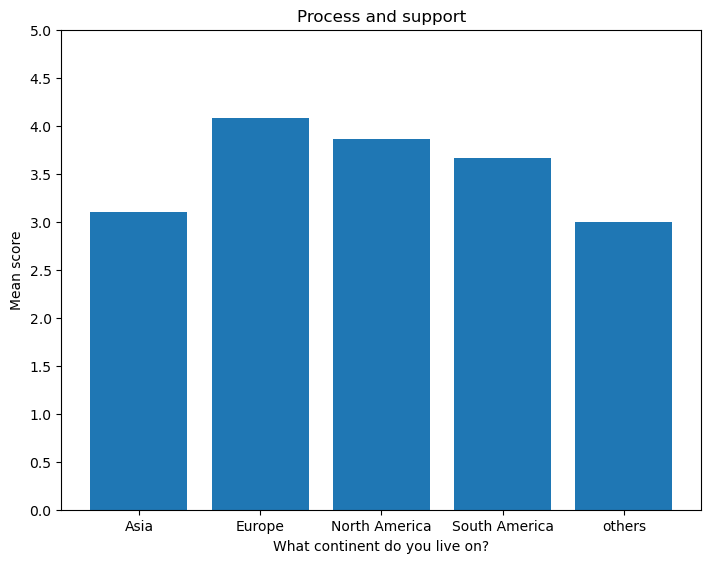

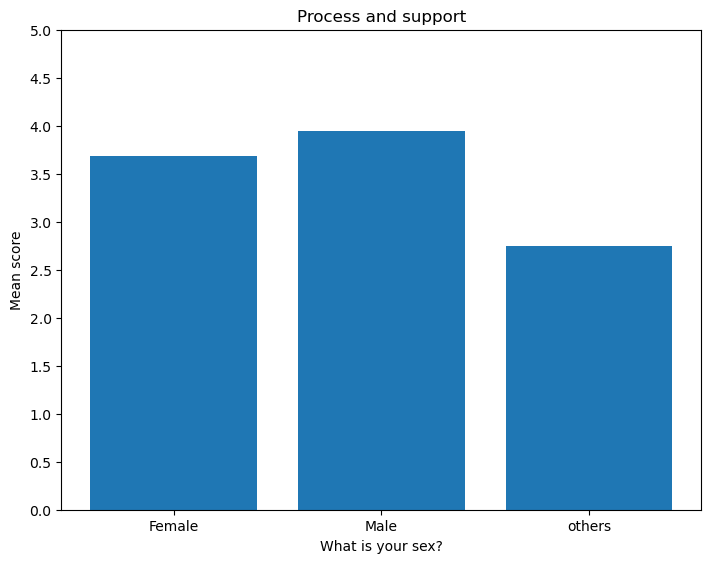

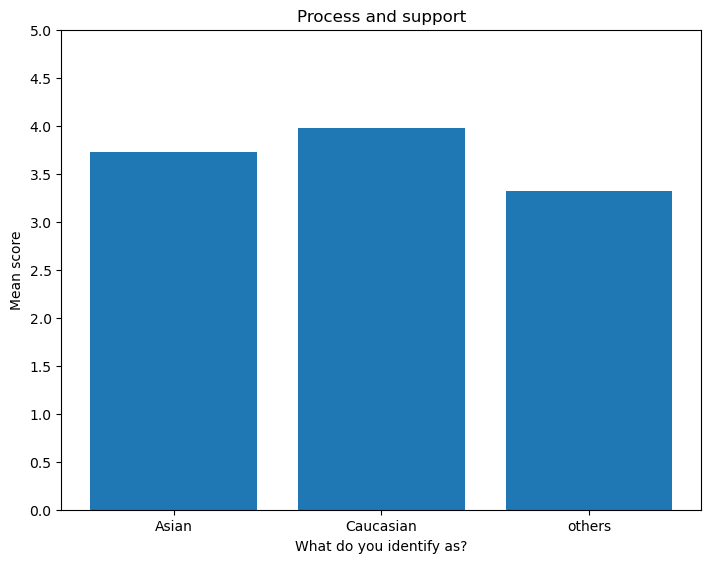

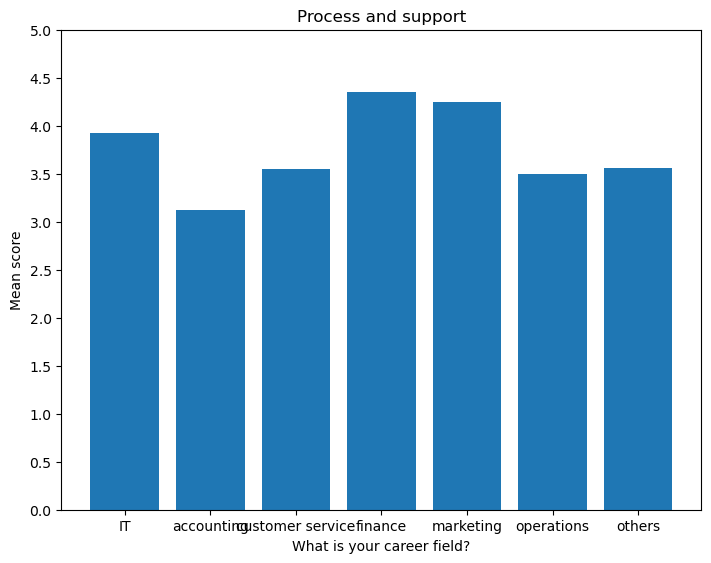

In [310]:
for group_df in group_dfs:
    plot_bar_graph(group_df, "Process and support")

## Aggregated dataframe analysis

In [311]:
aggregated_df.head(10)

,What age group do you belong to?,What is your marital status?,Do you have any kids in the household?,What continent do you live on?,What is your sex?,What do you identify as?,What is your career field?,Self \nleadership,Mental \nhealth,Work \nenvironment,Time,Training \nand career \ndevelopment,Physical \nhealth,Pay,Tooling,Process \nand support
0,18-25,Married,No,North America,Female,Caucasian,IT,4.125,4.250000,3.875,4.4,3.666667,3.2,3.75,4.000000,3.50
1,18-25,Single,No,North America,Male,others,IT,3.625,3.750000,4.000,4.2,3.333333,4.6,3.75,4.333333,4.00
2,36-45,Married,Yes,North America,Male,Caucasian,IT,4.250,4.083333,4.000,4.8,3.666667,3.0,5.00,4.000000,4.75
3,26-35,Single,No,North America,Male,Asian,IT,3.500,2.583333,3.375,4.6,3.333333,3.8,4.00,3.333333,3.50
4,18-25,Single,No,North America,Male,Caucasian,marketing,3.000,3.000000,3.750,5.0,4.666667,2.4,4.00,4.333333,5.00
5,26-35,Single,No,North America,Male,Caucasian,IT,4.250,4.833333,4.750,3.8,4.666667,3.8,5.00,5.000000,5.00
6,26-35,Single,No,North America,Male,Asian,IT,3.125,2.416667,2.875,5.0,3.000000,3.6,3.25,4.000000,4.00
7,26-35,Single,No,North America,Male,Asian,IT,5.000,4.333333,5.000,4.2,5.000000,4.2,3.00,5.000000,5.00
8,26-35,Married,Yes,North America,Female,Caucasian,customer service,3.750,4.000000,4.250,4.8,4.333333,3.6,5.00,4.666667,3.50
9,36-45,Married,No,Europe,Male,Caucasian,IT,3.875,4.500000,4.500,3.4,3.000000,3.2,4.50,5.000000,4.75


In [312]:
def plot_aggregated_bar_graph(df, column_name, title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = df.index
    y = df[column_name]
    ax.bar(x, y)
    ax.set_title(f'{title} - {column_name}')
    ax.set_ylabel("Mean score")
    ax.set_xlabel(df.index.name)
    ax.set_yticks(np.arange(0, 5.5, 0.5))
    plt.show()

In [313]:
group_dfs = [aggregated_df.groupby(demographics_column_names[i]).mean() for i in range(len(demographics_column_names))]

C:\Users\Bowragon\AppData\Local\Temp\ipykernel_3140\2200614908.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_dfs = [aggregated_df.groupby(demographics_column_names[i]).mean() for i in range(len(demographics_column_names))]
C:\Users\Bowragon\AppData\Local\Temp\ipykernel_3140\2200614908.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_dfs = [aggregated_df.groupby(demographics_column_names[i]).mean() for i in range(len(demographics_column_names))]
C:\Users\Bowragon\AppData\Local\Temp\ipykernel_3140\2200614908.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean i

## Age group

In [314]:
group_df = group_dfs[0]
group_df.head(10)

,Self \nleadership,Mental \nhealth,Work \nenvironment,Time,Training \nand career \ndevelopment,Physical \nhealth,Pay,Tooling,Process \nand support
What age group do you belong to?,,,,,,,,,
18-25,3.317308,3.217949,3.519231,4.338462,3.512821,2.938462,3.980769,3.923077,3.692308
26-35,3.826923,3.516026,3.903846,4.461538,3.743590,3.330769,4.317308,4.217949,3.846154
36-45,3.705357,3.517857,3.883929,4.142857,3.500000,3.185714,4.410714,4.047619,3.750000
46-55,2.750000,1.333333,2.000000,4.000000,2.000000,1.800000,2.500000,2.666667,2.750000
56+,4.125000,3.666667,3.750000,3.800000,4.000000,3.400000,4.000000,4.666667,4.000000
others,3.500000,3.250000,3.500000,5.000000,3.333333,3.000000,5.000000,5.000000,5.000000


In [315]:
transposed_df = group_df.T
transposed_df.head(10)

What age group do you belong to?,18-25,26-35,36-45,46-55,56+,others
Self \nleadership,3.317308,3.826923,3.705357,2.750000,4.125000,3.500000
Mental \nhealth,3.217949,3.516026,3.517857,1.333333,3.666667,3.250000
Work \nenvironment,3.519231,3.903846,3.883929,2.000000,3.750000,3.500000
Time,4.338462,4.461538,4.142857,4.000000,3.800000,5.000000
Training \nand career \ndevelopment,3.512821,3.743590,3.500000,2.000000,4.000000,3.333333
Physical \nhealth,2.938462,3.330769,3.185714,1.800000,3.400000,3.000000
Pay,3.980769,4.317308,4.410714,2.500000,4.000000,5.000000
Tooling,3.923077,4.217949,4.047619,2.666667,4.666667,5.000000
Process \nand support,3.692308,3.846154,3.750000,2.750000,4.000000,5.000000


In [316]:
column_names = [ column for column in transposed_df ]
print (column_names)

['18-25', '26-35', '36-45', '46-55', '56+', 'others']


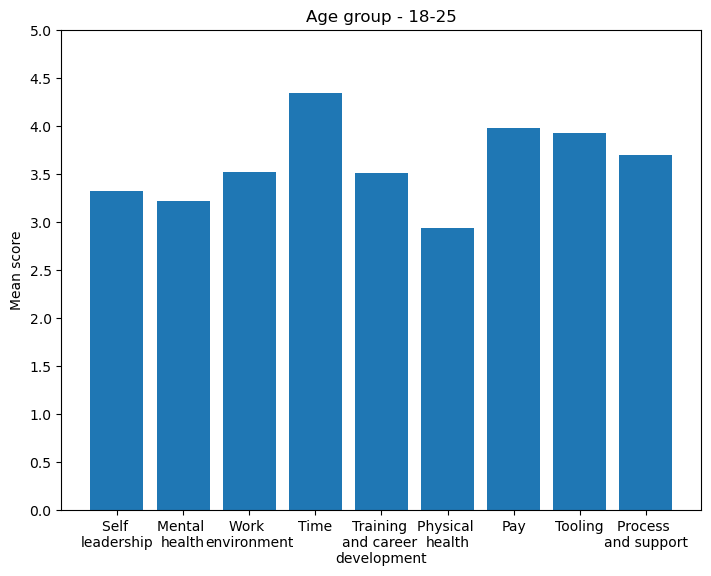

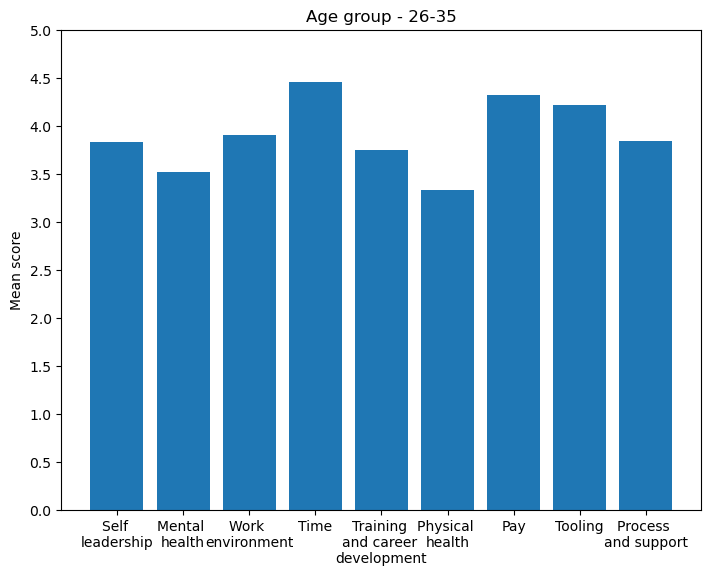

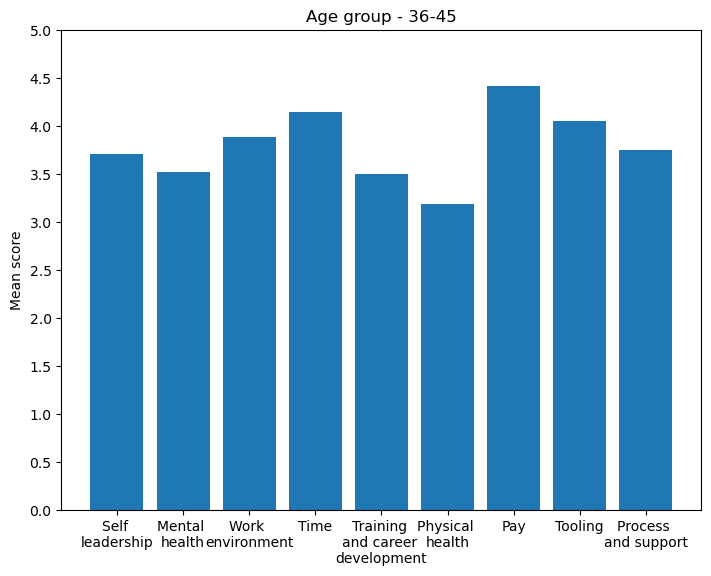

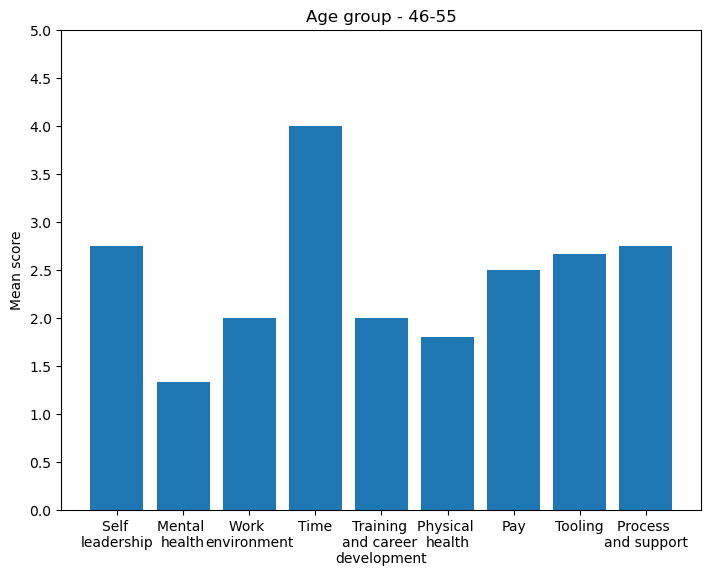

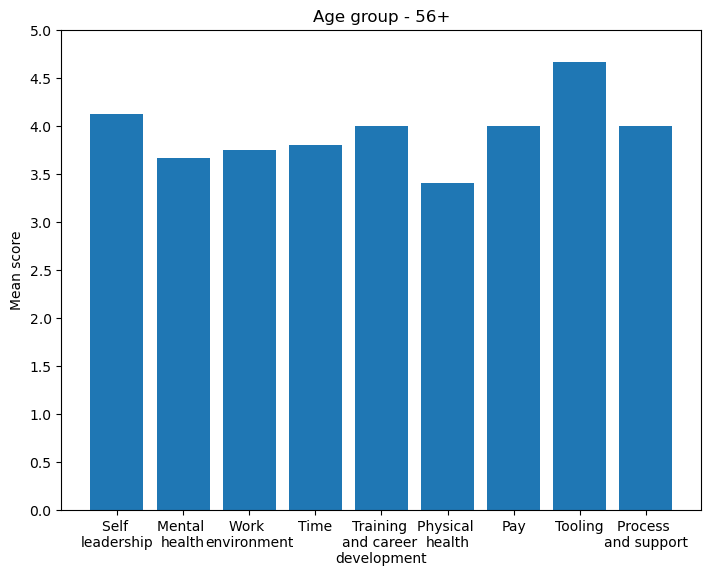

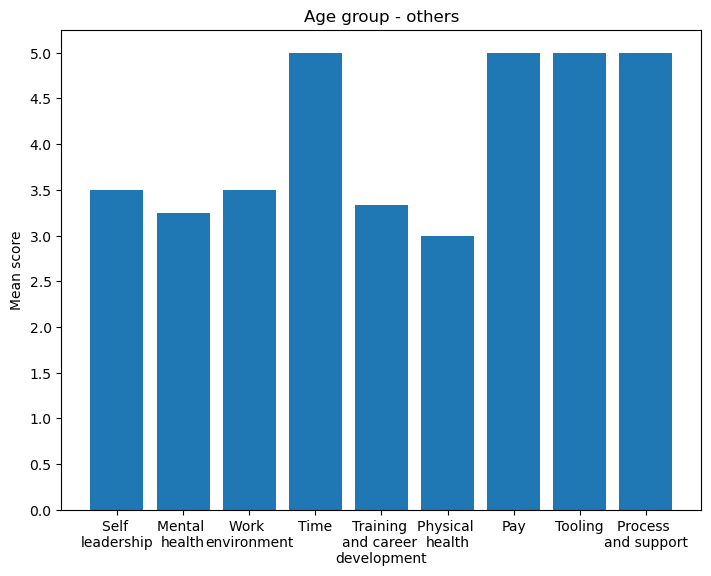

In [317]:
for column_name in column_names:
    plot_aggregated_bar_graph(transposed_df, column_name, "Age group")

## Marital status

In [318]:
group_df = group_dfs[1]
group_df.head(10)

,Self \nleadership,Mental \nhealth,Work \nenvironment,Time,Training \nand career \ndevelopment,Physical \nhealth,Pay,Tooling,Process \nand support
What is your marital status?,,,,,,,,,
Married,3.675000,3.508333,3.768750,4.200000,3.450000,3.130000,4.162500,4.016667,3.662500
Single,3.679167,3.425000,3.795833,4.466667,3.588889,3.220000,4.225000,4.088889,3.958333
others,3.500000,2.972222,3.604167,4.200000,4.111111,3.066667,4.541667,4.444444,3.375000


In [319]:
transposed_df = group_df.T
transposed_df.head(10)

What is your marital status?,Married,Single,others
Self \nleadership,3.675000,3.679167,3.500000
Mental \nhealth,3.508333,3.425000,2.972222
Work \nenvironment,3.768750,3.795833,3.604167
Time,4.200000,4.466667,4.200000
Training \nand career \ndevelopment,3.450000,3.588889,4.111111
Physical \nhealth,3.130000,3.220000,3.066667
Pay,4.162500,4.225000,4.541667
Tooling,4.016667,4.088889,4.444444
Process \nand support,3.662500,3.958333,3.375000


In [320]:
column_names = [ column for column in transposed_df ]
print (column_names)

['Married', 'Single', 'others']


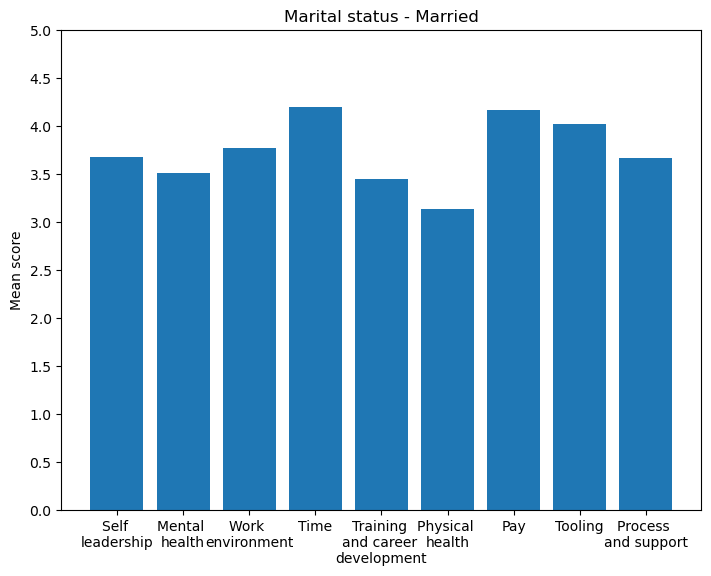

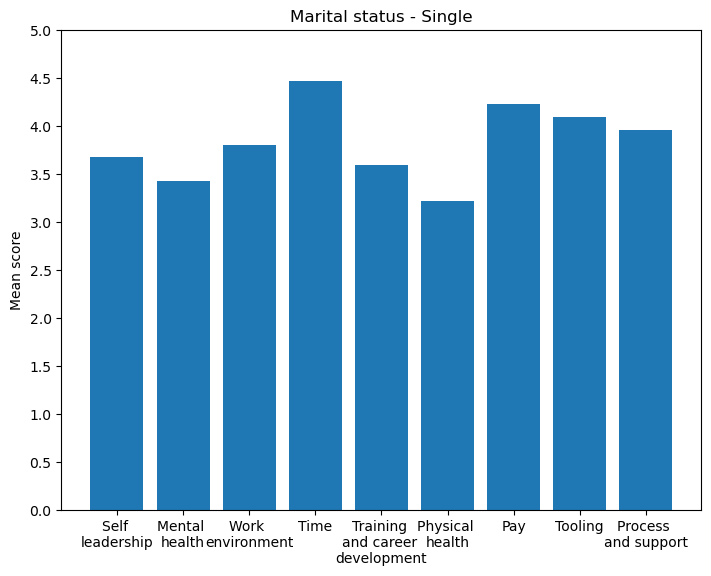

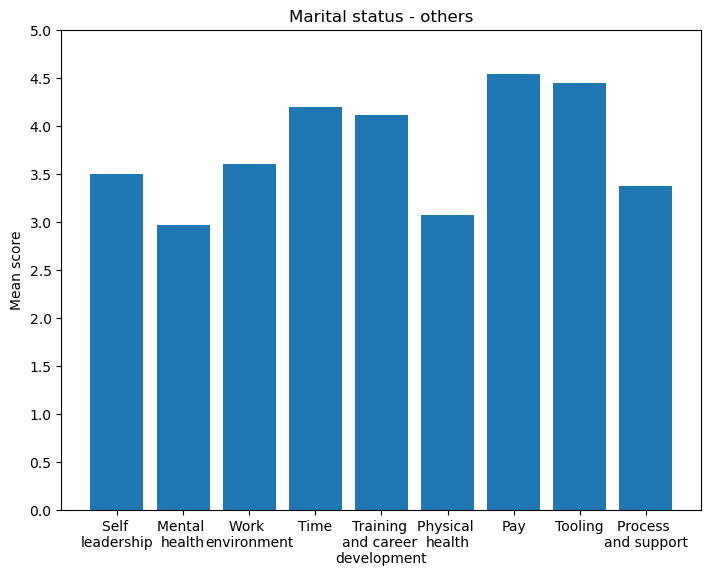

In [321]:
for column_name in column_names:
    plot_aggregated_bar_graph(transposed_df, column_name, "Marital status")

## Kid status

In [322]:
group_df = group_dfs[2]
group_df.head(10)

,Self \nleadership,Mental \nhealth,Work \nenvironment,Time,Training \nand career \ndevelopment,Physical \nhealth,Pay,Tooling,Process \nand support
Do you have any kids in the household?,,,,,,,,,
No,3.678125,3.43125,3.800000,4.4350,3.575000,3.2450,4.18125,4.133333,3.85625
Yes,3.609375,3.34375,3.679688,4.1125,3.645833,2.9875,4.37500,4.020833,3.62500


In [323]:
transposed_df = group_df.T
transposed_df.head(10)

Do you have any kids in the household?,No,Yes
Self \nleadership,3.678125,3.609375
Mental \nhealth,3.431250,3.343750
Work \nenvironment,3.800000,3.679688
Time,4.435000,4.112500
Training \nand career \ndevelopment,3.575000,3.645833
Physical \nhealth,3.245000,2.987500
Pay,4.181250,4.375000
Tooling,4.133333,4.020833
Process \nand support,3.856250,3.625000


In [324]:
column_names = [ column for column in transposed_df ]
print (column_names)

['No', 'Yes']


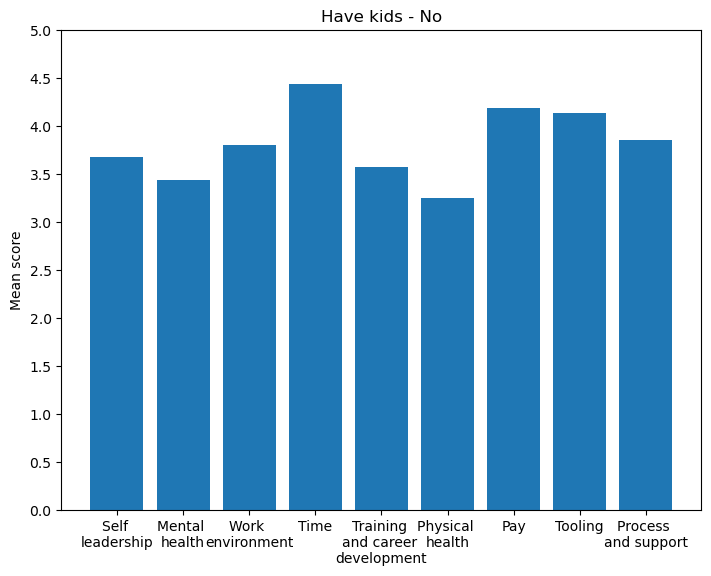

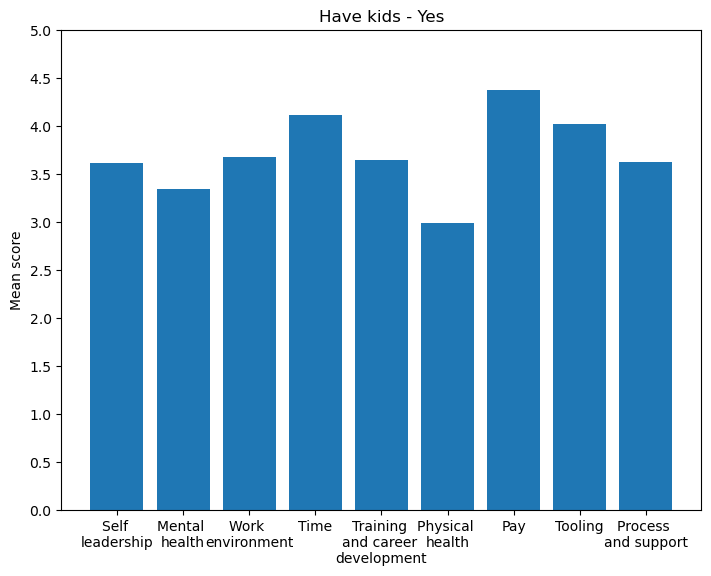

In [325]:
for column_name in column_names:
    plot_aggregated_bar_graph(transposed_df, column_name, "Have kids")

## Continent

In [326]:
group_df = group_dfs[3]
group_df.head(10)

,Self \nleadership,Mental \nhealth,Work \nenvironment,Time,Training \nand career \ndevelopment,Physical \nhealth,Pay,Tooling,Process \nand support
What continent do you live on?,,,,,,,,,
Asia,3.400000,3.016667,3.275000,3.800000,3.266667,3.040000,3.100000,3.000000,3.100000
Europe,3.520833,3.375000,3.875000,4.333333,3.833333,3.066667,4.708333,4.666667,4.083333
North America,3.707317,3.479675,3.850610,4.414634,3.658537,3.253659,4.371951,4.235772,3.859756
South America,3.708333,3.166667,3.458333,4.066667,3.111111,2.800000,3.750000,3.333333,3.666667
others,3.625000,3.250000,3.000000,5.000000,2.666667,2.200000,3.000000,3.000000,3.000000


In [327]:
transposed_df = group_df.T
transposed_df.head(10)

What continent do you live on?,Asia,Europe,North America,South America,others
Self \nleadership,3.400000,3.520833,3.707317,3.708333,3.625000
Mental \nhealth,3.016667,3.375000,3.479675,3.166667,3.250000
Work \nenvironment,3.275000,3.875000,3.850610,3.458333,3.000000
Time,3.800000,4.333333,4.414634,4.066667,5.000000
Training \nand career \ndevelopment,3.266667,3.833333,3.658537,3.111111,2.666667
Physical \nhealth,3.040000,3.066667,3.253659,2.800000,2.200000
Pay,3.100000,4.708333,4.371951,3.750000,3.000000
Tooling,3.000000,4.666667,4.235772,3.333333,3.000000
Process \nand support,3.100000,4.083333,3.859756,3.666667,3.000000


In [328]:
column_names = [ column for column in transposed_df ]
print (column_names)

['Asia', 'Europe', 'North America', 'South America', 'others']


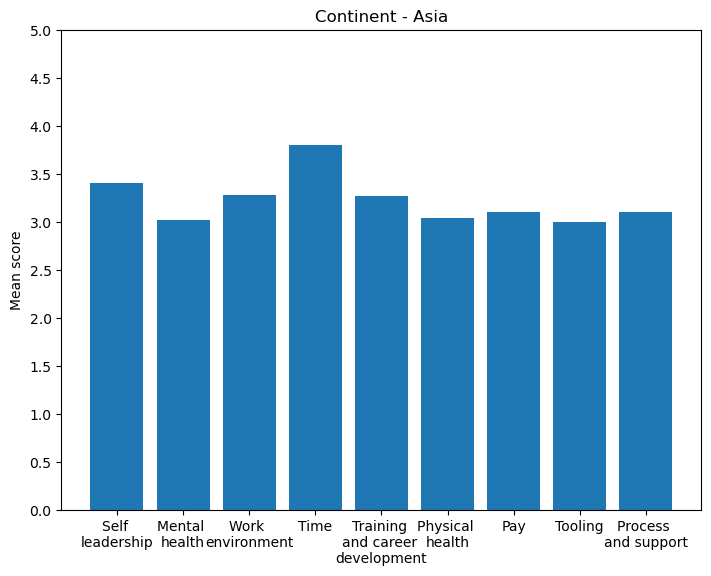

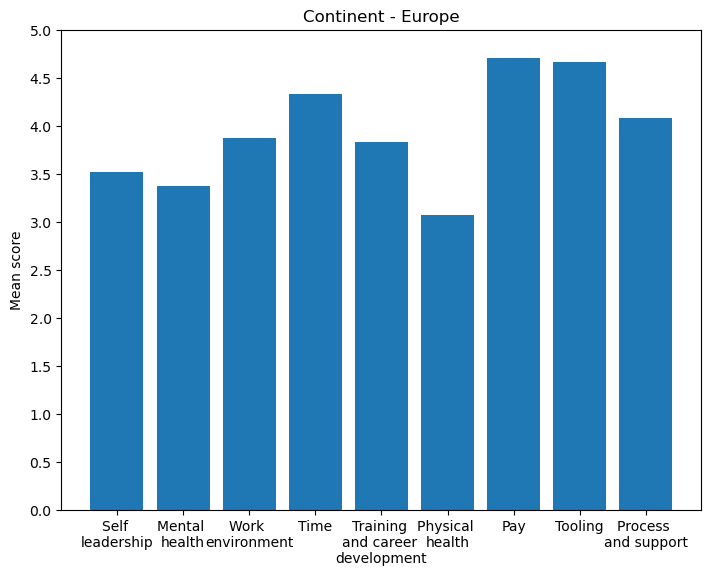

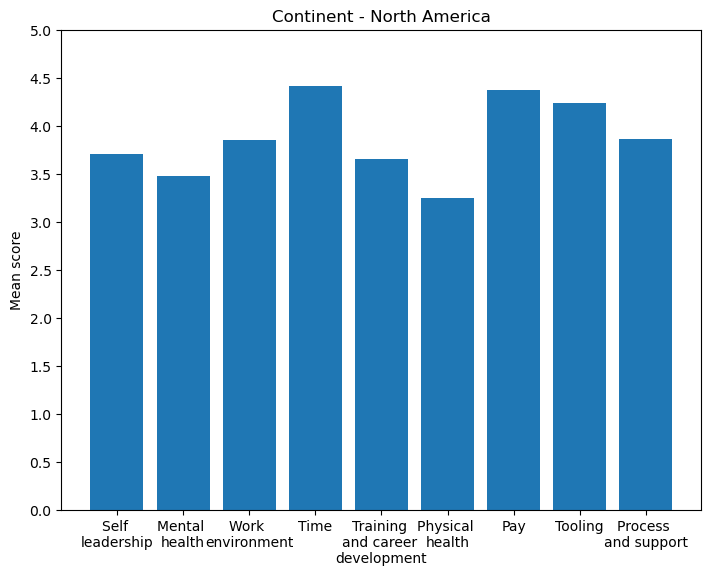

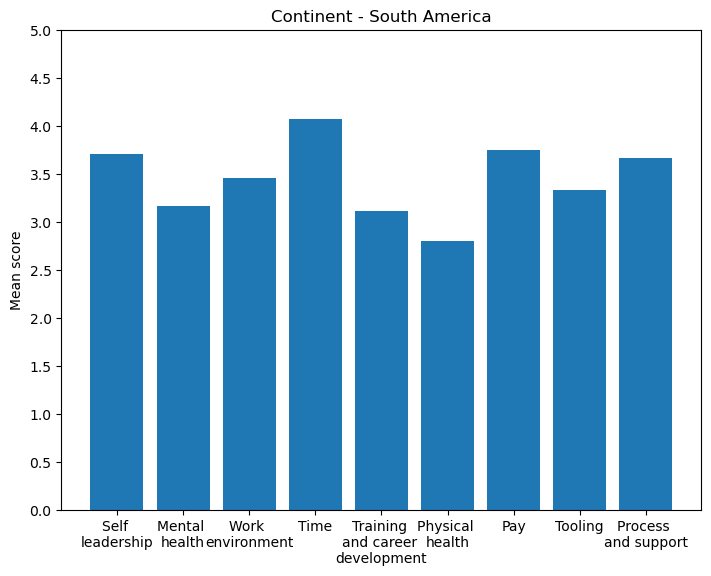

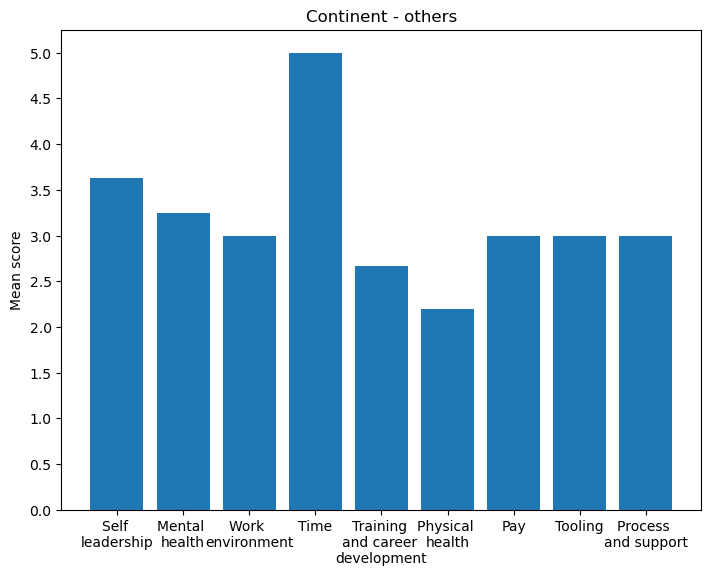

In [329]:
for column_name in column_names:
    plot_aggregated_bar_graph(transposed_df, column_name, "Continent")

## Sex

In [330]:
group_df = group_dfs[4]
group_df.head(10)

,Self \nleadership,Mental \nhealth,Work \nenvironment,Time,Training \nand career \ndevelopment,Physical \nhealth,Pay,Tooling,Process \nand support
What is your sex?,,,,,,,,,
Female,3.723958,3.576389,3.807292,4.300000,3.680556,3.166667,4.354167,4.180556,3.687500
Male,3.616667,3.288889,3.737500,4.413333,3.566667,3.213333,4.108333,4.000000,3.941667
others,3.500000,3.125000,3.687500,3.800000,3.000000,2.600000,4.750000,4.666667,2.750000


In [331]:
transposed_df = group_df.T
transposed_df.head(10)

What is your sex?,Female,Male,others
Self \nleadership,3.723958,3.616667,3.500000
Mental \nhealth,3.576389,3.288889,3.125000
Work \nenvironment,3.807292,3.737500,3.687500
Time,4.300000,4.413333,3.800000
Training \nand career \ndevelopment,3.680556,3.566667,3.000000
Physical \nhealth,3.166667,3.213333,2.600000
Pay,4.354167,4.108333,4.750000
Tooling,4.180556,4.000000,4.666667
Process \nand support,3.687500,3.941667,2.750000


In [332]:
column_names = [ column for column in transposed_df ]
print (column_names)

['Female', 'Male', 'others']


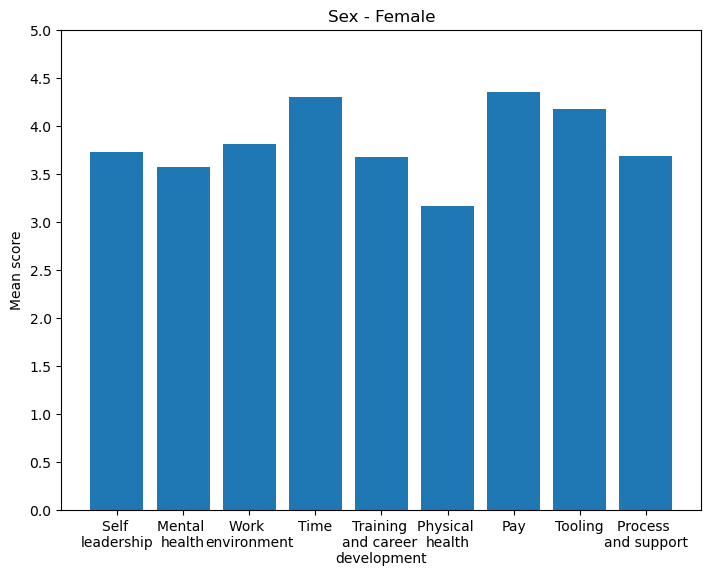

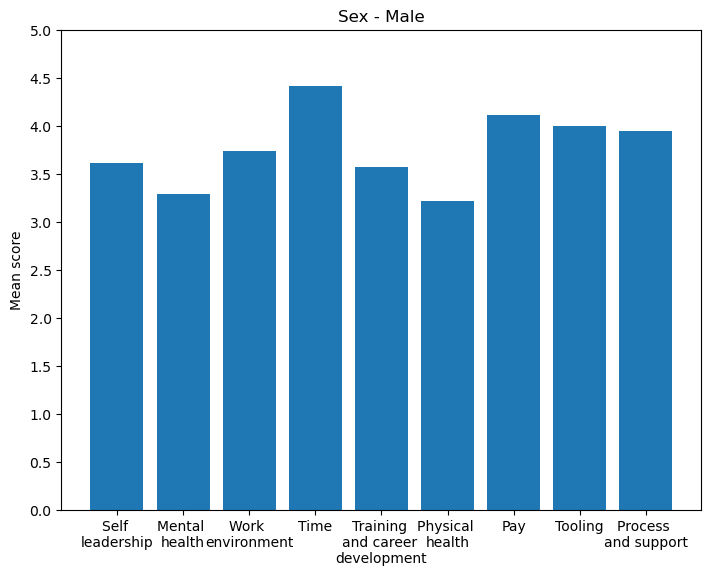

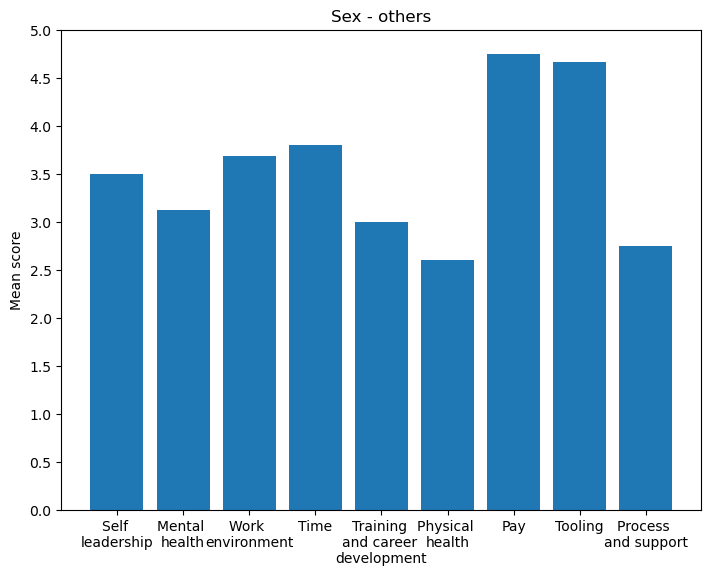

In [333]:
for column_name in column_names:
    plot_aggregated_bar_graph(transposed_df, column_name, "Sex")

## Ethnicity

In [334]:
group_df = group_dfs[5]
group_df.head(10)

,Self \nleadership,Mental \nhealth,Work \nenvironment,Time,Training \nand career \ndevelopment,Physical \nhealth,Pay,Tooling,Process \nand support
What do you identify as?,,,,,,,,,
Asian,3.520833,3.093750,3.458333,4.425000,3.263889,3.083333,3.812500,3.805556,3.729167
Caucasian,3.790000,3.763333,4.030000,4.320000,3.906667,3.232000,4.530000,4.293333,3.980000
others,3.660714,3.202381,3.875000,4.142857,3.619048,3.257143,4.642857,4.428571,3.321429


In [335]:
transposed_df = group_df.T
transposed_df.head(10)

What do you identify as?,Asian,Caucasian,others
Self \nleadership,3.520833,3.790000,3.660714
Mental \nhealth,3.093750,3.763333,3.202381
Work \nenvironment,3.458333,4.030000,3.875000
Time,4.425000,4.320000,4.142857
Training \nand career \ndevelopment,3.263889,3.906667,3.619048
Physical \nhealth,3.083333,3.232000,3.257143
Pay,3.812500,4.530000,4.642857
Tooling,3.805556,4.293333,4.428571
Process \nand support,3.729167,3.980000,3.321429


In [336]:
column_names = [ column for column in transposed_df ]
print (column_names)

['Asian', 'Caucasian', 'others']


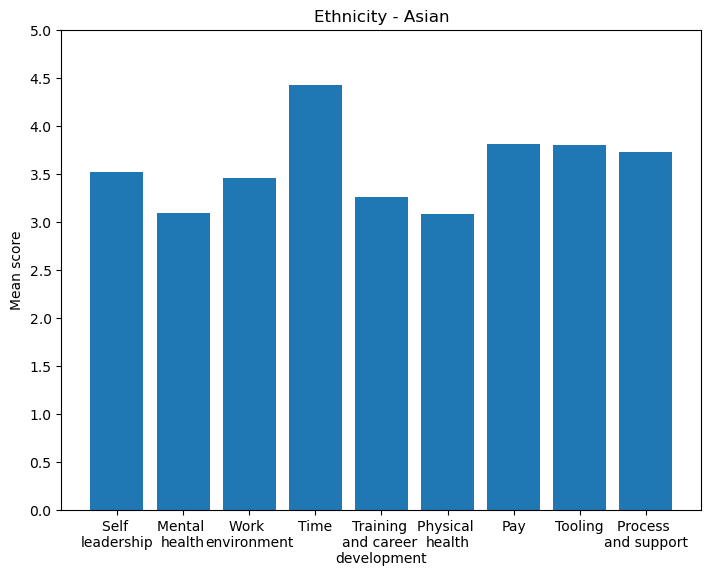

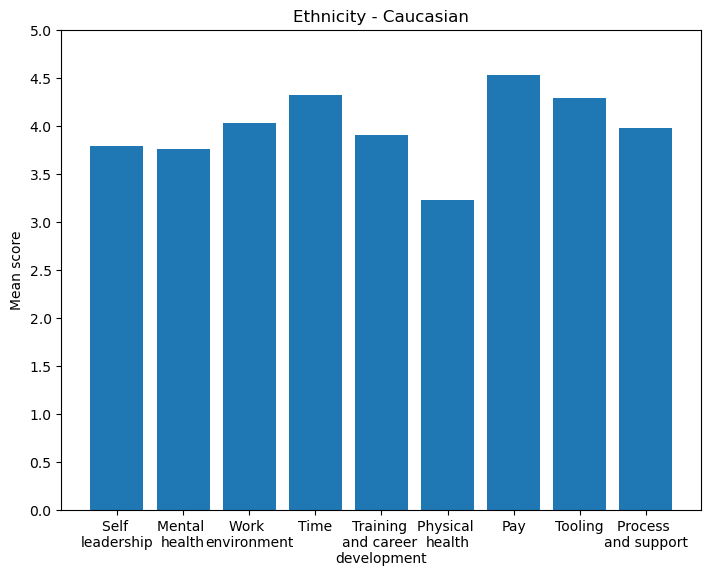

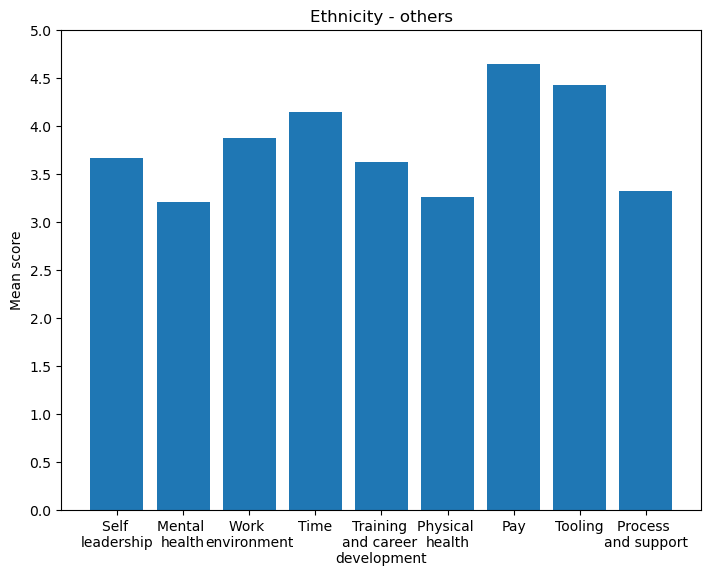

In [337]:
for column_name in column_names:
    plot_aggregated_bar_graph(transposed_df, column_name, "Ethnicity")

## Career field

In [338]:
group_df = group_dfs[6]
group_df.head(10)

,Self \nleadership,Mental \nhealth,Work \nenvironment,Time,Training \nand career \ndevelopment,Physical \nhealth,Pay,Tooling,Process \nand support
What is your career field?,,,,,,,,,
IT,3.750000,3.447917,3.776042,4.541667,3.500000,3.341667,4.166667,4.152778,3.927083
accounting,4.125000,3.208333,3.562500,3.800000,3.833333,3.400000,4.125000,4.000000,3.125000
customer service,3.613636,3.628788,3.863636,4.418182,3.636364,3.054545,4.204545,4.181818,3.545455
finance,3.750000,3.466667,3.875000,4.160000,3.733333,3.320000,4.250000,4.266667,4.350000
marketing,2.750000,2.583333,3.312500,4.400000,4.000000,2.800000,4.000000,3.666667,4.250000
operations,3.781250,3.625000,3.843750,3.950000,3.833333,3.150000,4.125000,3.416667,3.500000
others,3.437500,3.083333,3.656250,4.075000,3.458333,2.775000,4.625000,4.208333,3.562500


In [339]:
transposed_df = group_df.T
transposed_df.head(10)

What is your career field?,IT,accounting,customer service,finance,marketing,operations,others
Self \nleadership,3.750000,4.125000,3.613636,3.750000,2.750000,3.781250,3.437500
Mental \nhealth,3.447917,3.208333,3.628788,3.466667,2.583333,3.625000,3.083333
Work \nenvironment,3.776042,3.562500,3.863636,3.875000,3.312500,3.843750,3.656250
Time,4.541667,3.800000,4.418182,4.160000,4.400000,3.950000,4.075000
Training \nand career \ndevelopment,3.500000,3.833333,3.636364,3.733333,4.000000,3.833333,3.458333
Physical \nhealth,3.341667,3.400000,3.054545,3.320000,2.800000,3.150000,2.775000
Pay,4.166667,4.125000,4.204545,4.250000,4.000000,4.125000,4.625000
Tooling,4.152778,4.000000,4.181818,4.266667,3.666667,3.416667,4.208333
Process \nand support,3.927083,3.125000,3.545455,4.350000,4.250000,3.500000,3.562500


In [340]:
column_names = [ column for column in transposed_df ]
print (column_names)

['IT', 'accounting', 'customer service', 'finance', 'marketing', 'operations', 'others']


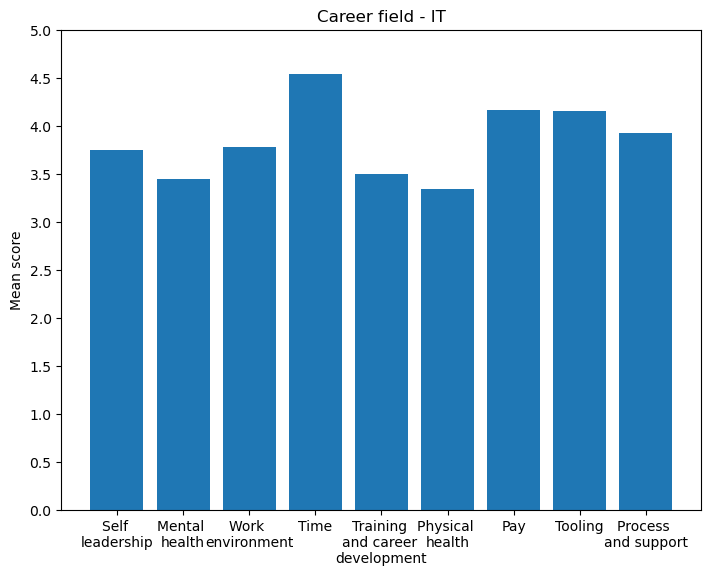

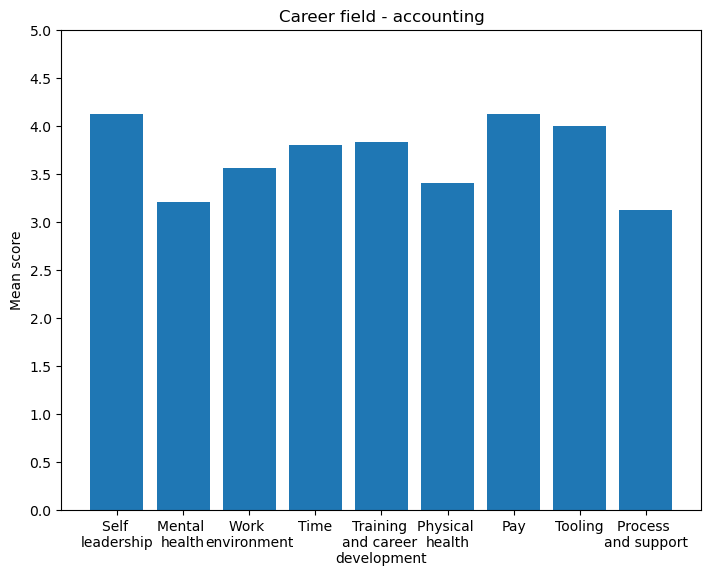

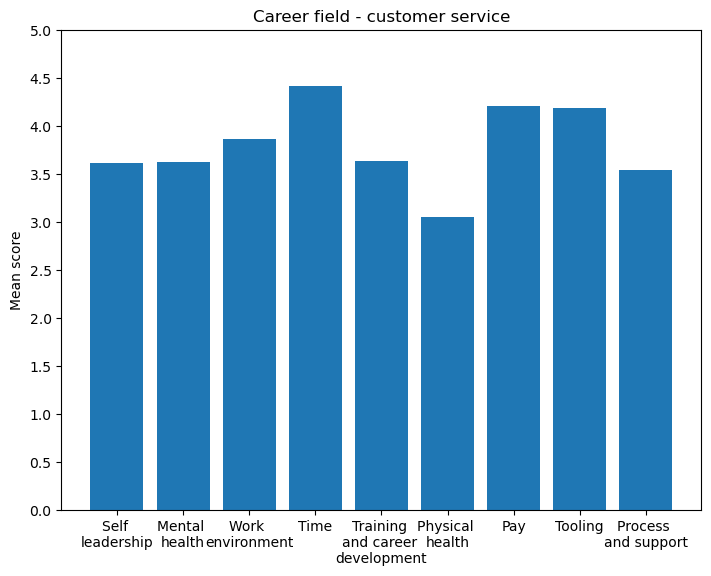

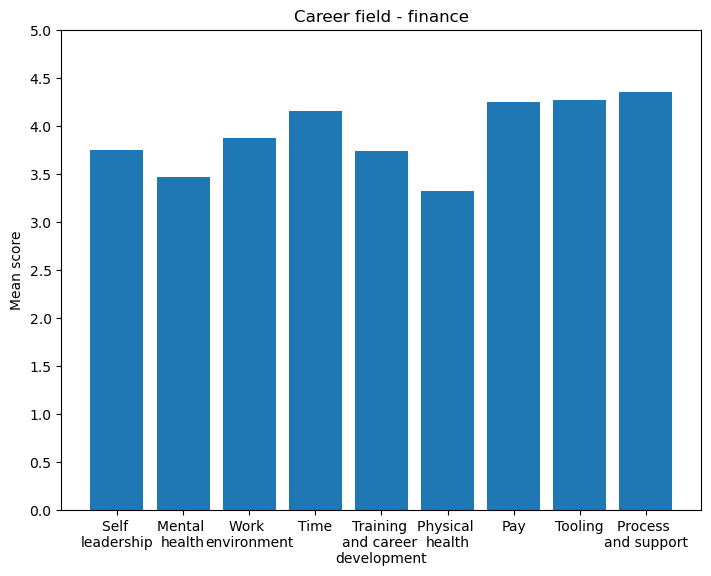

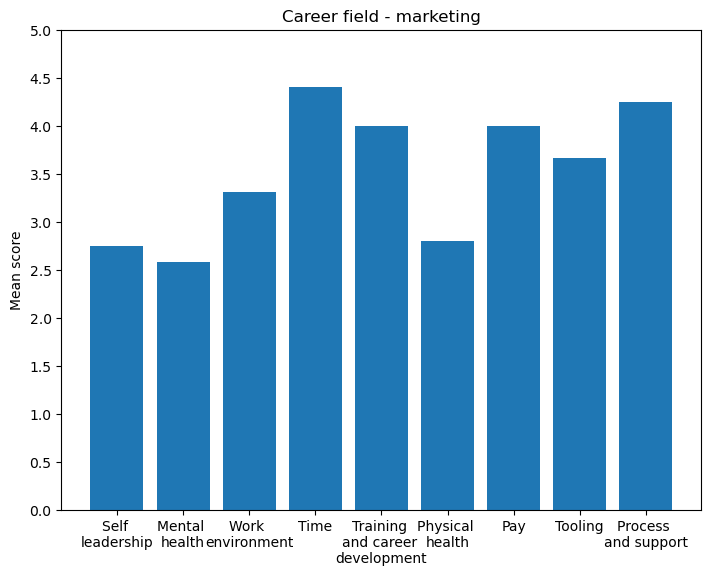

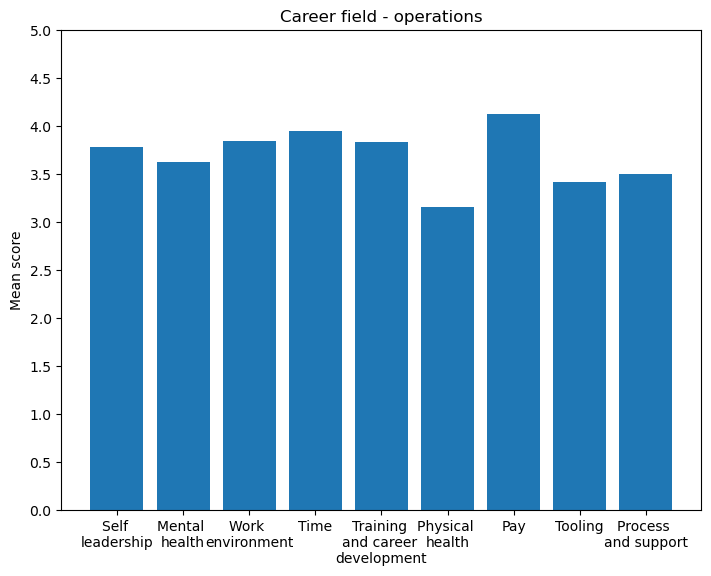

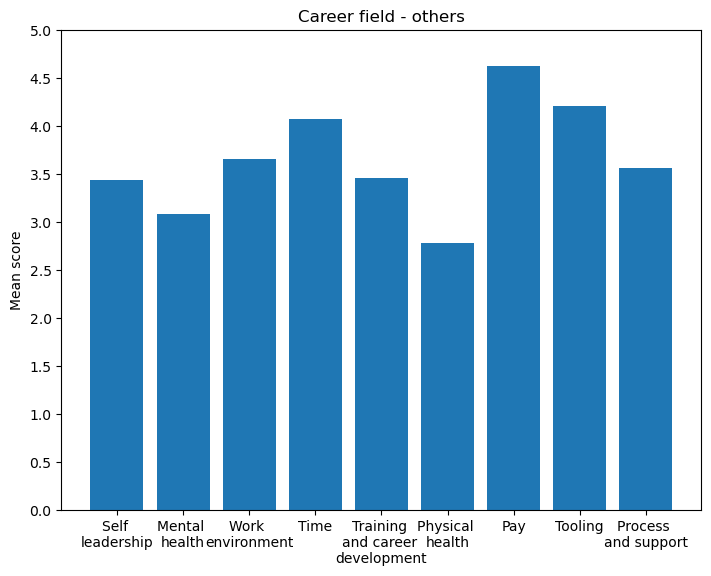

In [341]:
for column_name in column_names:
    plot_aggregated_bar_graph(transposed_df, column_name, "Career field")